## 1. Dataset Justification

The dataset used in this pipeline, `cybersecurity_attacks.csv`, consists of 40,000 labeled records representing various network events. It includes rich features such as source and destination IPs, ports, packet lengths, protocols, and payload data. This makes it well-suited for cybersecurity applications including anomaly detection, traffic classification, and attack pattern recognition.

The dataset was selected because:
- It contains a large number of real-world-like traffic logs with labeled and structured features.
- The diversity of attributes enables multi-dimensional analysis and visualization.
- It provides sufficient volume for statistical and machine learning techniques without being too large to handle on a personal machine.

In the context of cybersecurity research and analytics, this dataset supports various tasks such as:
- Identifying outlier traffic patterns that may indicate attacks
- Visualizing packet behavior over time
- Segmenting the dataset into different threat levels based on network behavior

Therefore, it is highly suitable for demonstrating a full cybersecurity data science pipeline, from preprocessing to analysis.

                                

In [31]:
# %% STEP 1 – Import libraries
import pandas as pd

# %% STEP 2 – Load your dataset
df = pd.read_csv("cybersecurity_attacks.csv")

# %% STEP 3 – Show basic info
pd.set_option('display.max_columns', None)  # Show all columns
df.info()

# %% STEP 4 – Preview data
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      20000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Alerts/Warnings         19933 non-null  object 
 13  Attack Type             40000 non-null  object 
 14  Attack Signature        40000 non-null

Timestamp Source IP Address Destination IP Address  Source Port  \
0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
4  2023-07-16 13:11:07     71.166.185.76        189.243.174.238         6131   

   Destination Port Protocol  Packet Length Packet Type Traffic Type  \
0             17616     ICMP            503        Data         HTTP   
1             48166     ICMP           1174        Data         HTTP   
2             53600      UDP            306     Control         HTTP   
3             32534      UDP            385        Data         HTTP   
4             26646      TCP           1462        Data          DNS   

                                        Payload Data Malware Indicators  \
0  Qui natus odio asperiores nam. Optio nobis ius...       IoC Detected   
1  Aperiam quos modi officiis veritatis rem. Omni...       IoC Detected   
2  Perferendis sapiente vitae soluta. Hic delectu...       IoC Detected   
3  Totam maxime beatae expedita explicabo porro l...                NaN   
4  Odit nesciunt dolorem nisi iste iusto. Animi v...                NaN   

   Anomaly Scores  Alerts/Warnings Attack Type Attack Signature Action Taken  \
0           28.67              NaN     Malware  Known Pattern B       Logged   
1           51.50              NaN     Malware  Known Pattern A      Blocked   
2           87.42  Alert Triggered        DDoS  Known Pattern B      Ignored   
3           15.79  Alert Triggered     Malware  Known Pattern B      Blocked   
4            0.52  Alert Triggered        DDoS  Known Pattern B      Blocked   

  Severity Level User Information  \
0            Low    Reyansh Dugal   
1            Low       Sumer Rana   
2            Low     Himmat Karpe   
3         Medium       Fateh Kibe   
4            Low     Dhanush Chad   

                                  Device Information Network Segment  \
0  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...       Segment A   
1  Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...       Segment B   
2  Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...       Segment C   
3  Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...       Segment B   
4  Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...       Segment C   

    Geo-location Data Proxy Information Firewall Logs IDS/IPS Alerts  \
0  Jamshedpur, Sikkim      150.9.97.135      Log Data            NaN   
1  Bilaspur, Nagaland               NaN      Log Data            NaN   
2   Bokaro, Rajasthan    114.133.48.179      Log Data     Alert Data   
3  Jaunpur, Rajasthan               NaN           NaN     Alert Data   
4  Anantapur, Tripura     149.6.110.119           NaN     Alert Data   

  Log Source  
0     Server  
1   Firewall  
2   Firewall  
3   Firewall  
4   Firewall

## 2. System Stage

The dataset used for this pipeline is a single structured file:

- `cybersecurity_attacks.csv`: Contains over 40,000 labeled entries of network activity data, including both normal and malicious behaviors.

### File Characteristics:
- File format: CSV (comma-separated), with header row.
- Each row represents a single network event/session.
- Data fields include protocol, source/destination IP and ports, packet metadata, action taken, attack type, severity level, and additional security indicators.
- The target variable for classification is `Severity Level`, categorized into: `Low`, `Medium`, and `High`.



## 3. Initial Data Exploration

Before preprocessing, it's important to understand the structure and quality of the dataset. This includes:

- Checking data types of each column to ensure correct interpretation.
- Identifying missing values that may require imputation or removal.
- Reviewing unique values in key categorical features such as protocol type, service, and flag to understand the possible categories and detect any anomalies.

These steps help shape the preprocessing strategy and model choice later in the pipeline.


In [32]:
# STEP 1 – Import libraries
import pandas as pd

# STEP 2 – Load your dataset
df = pd.read_csv("cybersecurity_attacks.csv")  # Make sure this file exists in the same folder

# STEP 3 – Explore Metadata
print("Data types in dataset:\n")
print(df.dtypes)

print("\nMissing values per column:\n")
print(df.isnull().sum())

# Show unique values for key categorical columns (if they exist)
for col in ['Protocol', 'Packet Type', 'Traffic Type', 'Attack Type', 'Severity Level']:
    if col in df.columns:
        print(f"\nUnique values in '{col}':\n", df[col].unique())



Data types in dataset:

Timestamp                  object
Source IP Address          object
Destination IP Address     object
Source Port                 int64
Destination Port            int64
Protocol                   object
Packet Length               int64
Packet Type                object
Traffic Type               object
Payload Data               object
Malware Indicators         object
Anomaly Scores            float64
Alerts/Warnings            object
Attack Type                object
Attack Signature           object
Action Taken               object
Severity Level             object
User Information           object
Device Information         object
Network Segment            object
Geo-location Data          object
Proxy Information          object
Firewall Logs              object
IDS/IPS Alerts             object
Log Source                 object
dtype: object

Missing values per column:

Timestamp                     0
Source IP Address             0
Destination IP Addr

In [33]:
# STEP 1 – Import
import pandas as pd

# STEP 2 – Load dataset (you can rename df to train_df if you'd like to match the naming)
train_df = pd.read_csv("cybersecurity_attacks.csv")

# STEP 3 – Get number of unique values in each column
print("Number of unique values in each column:\n")
print(train_df.nunique().sort_values())


Number of unique values in each column:

Alerts/Warnings               1
Malware Indicators            1
IDS/IPS Alerts                1
Firewall Logs                 1
Packet Type                   2
Log Source                    2
Attack Signature              2
Traffic Type                  3
Severity Level                3
Protocol                      3
Action Taken                  3
Network Segment               3
Attack Type                   3
Packet Length              1437
Geo-location Data          8723
Anomaly Scores             9826
Proxy Information         20148
Source Port               29761
Destination Port          29895
Device Information        32104
User Information          32389
Timestamp                 39997
Destination IP Address    40000
Source IP Address         40000
Payload Data              40000
dtype: int64


In [34]:
## analyze and visualize the number of unique values per column


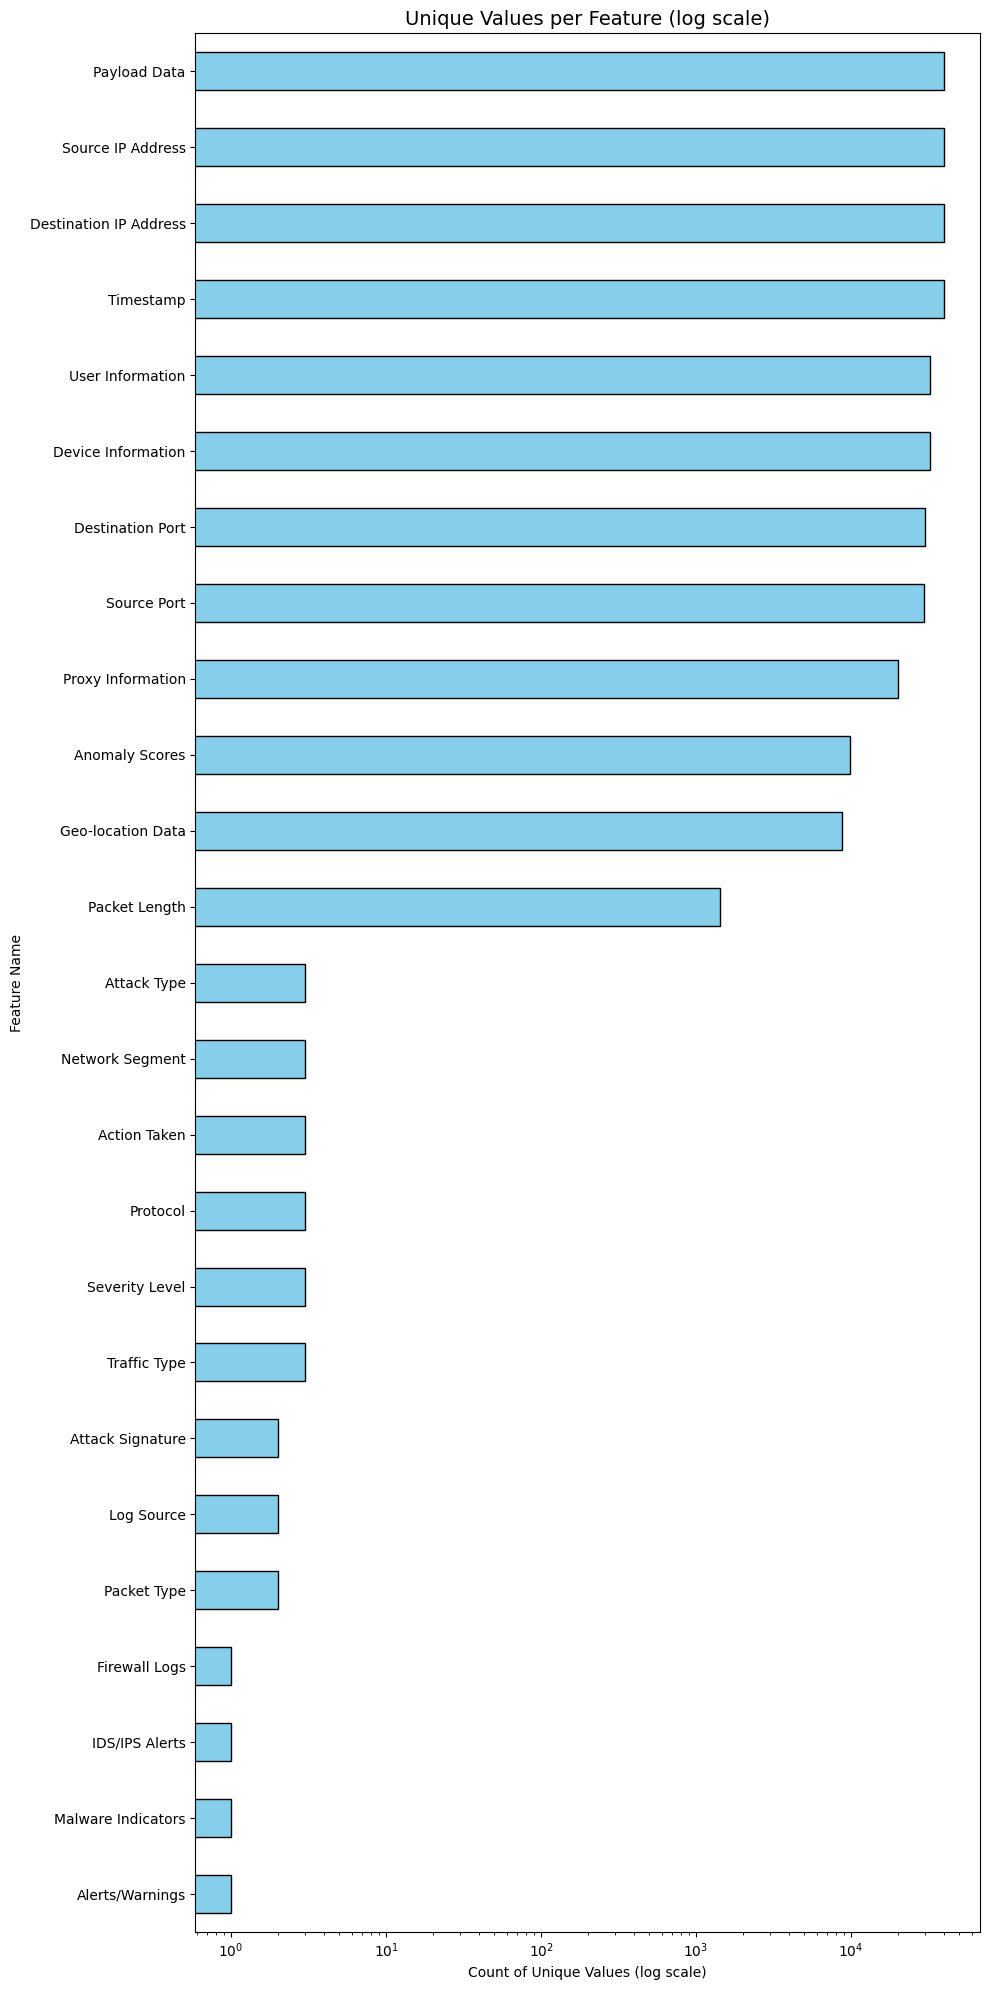

In [35]:
# %% STEP – Analyze Unique Values per Column

import matplotlib.pyplot as plt
import os

# Make sure the plots directory exists
os.makedirs("plots", exist_ok=True)

# Compute number of unique values per column and sort
unique_counts = train_df.nunique().sort_values()

# Plot horizontal bar chart with log scale
plt.figure(figsize=(10, 20))
ax = unique_counts.plot(
    kind='barh',
    color='skyblue',
    edgecolor='black',
    logx=True  # Use log scale on x-axis
)
ax.set_title("Unique Values per Feature (log scale)", fontsize=14)
ax.set_xlabel("Count of Unique Values (log scale)")
ax.set_ylabel("Feature Name")
plt.tight_layout()

# Save and display the plot
plt.savefig("plots/unique_counts_log_scale.png", dpi=300)
plt.show()


In [36]:
##The dataset exhibits a wide range of unique values across its features. high-cardinality fields like Payload Data, IP Addresses, and Timestamps suggest session-specific information that may require removal or transformation. On the other hand, low-cardinality features such as Protocol, Severity Level, and Traffic Type are suitable for categorical encoding. No missing values were found, and the dataset appears clean with no obvious placeholders. This variability informs how features should be handled during preprocessing for modeling.


In [37]:
## Data Stats

In [38]:
# %% STEP 4 – Central Tendencies of Numeric Features
import pandas as pd

# Assuming train_df is already loaded and cleaned
# Select only numeric columns, drop 'difficulty' if present
numeric_features = train_df.select_dtypes(include='number')
if 'difficulty' in numeric_features.columns:
    numeric_features = numeric_features.drop(columns='difficulty')

# Generate descriptive statistics and transpose
desc = numeric_features.describe().T

# Select relevant central tendency measures and rename median
central_tendency = desc[['mean', 'std', 'min', '50%', 'max']].rename(columns={'50%': 'median'})

# Round values for readability
central_tendency_rounded = central_tendency.round(3)

# Display the statistics nicely formatted
central_tendency_rounded.style.format(precision=3)


## The dataset contains a mix of port numbers, packet measurements, and anomaly scores:The Source Port and Destination Port have similar distributions, centered around ~33,000, with values ranging from ~1,000 to ~65,000, suggesting high variability.Packet Length has a mean and median close to 781, indicating a roughly symmetric distribution with a maximum of 1500 bytes.Anomaly Scores are uniformly spread, with a mean around 50 and a standard deviation of ~28.8, covering the full scale from 0 to 100.

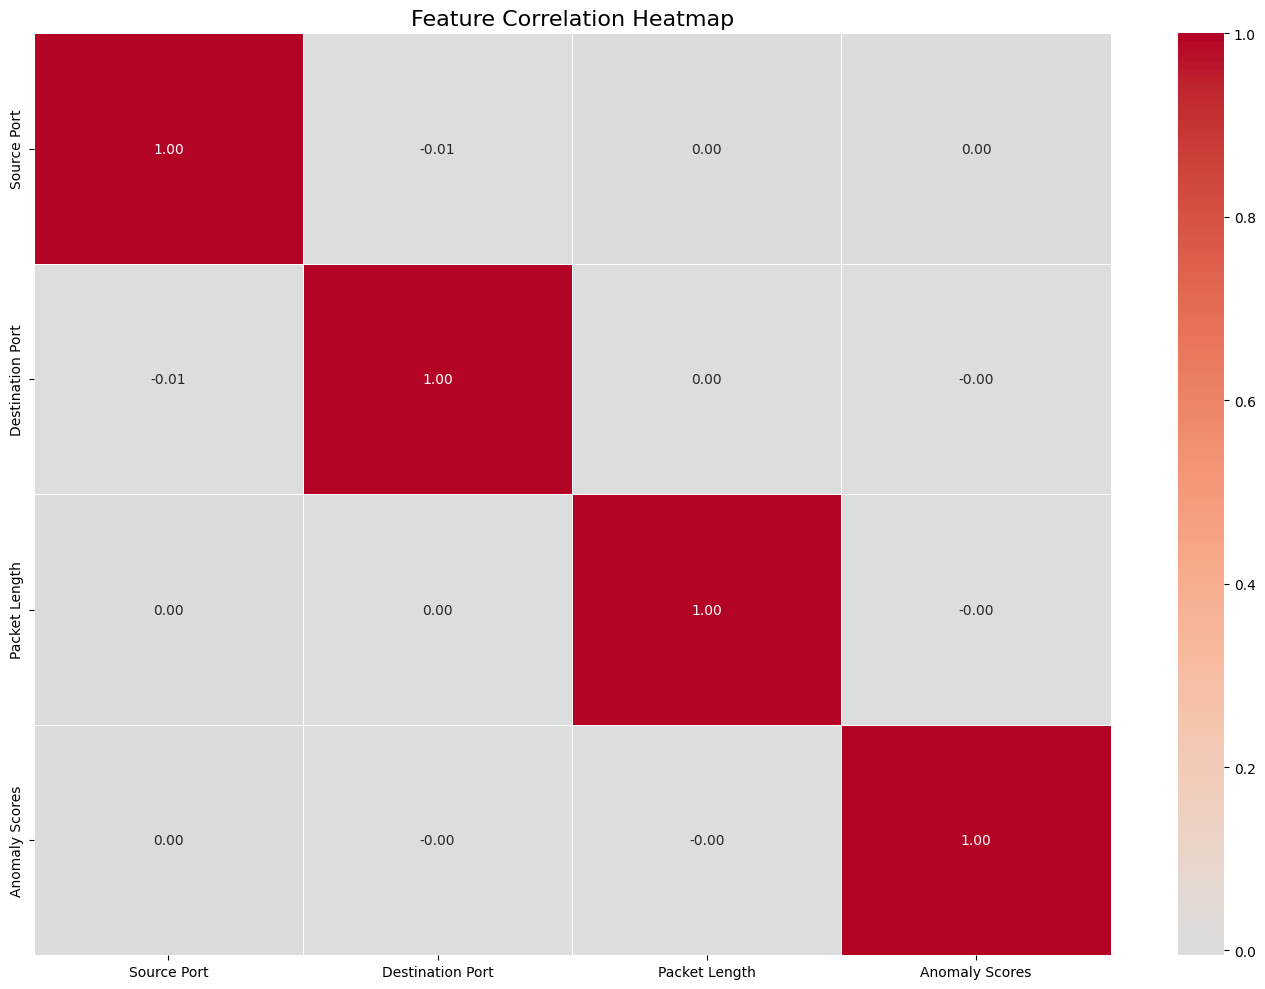

In [39]:


## STEP 5 – Correlation Heatmap

# If not already defined, select only numeric columns
numeric_features = df.select_dtypes(include='number')


# Compute correlation matrix
correlation_matrix = numeric_features.corr()

# Plot correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))
sns.heatmap(
    correlation_matrix,
    cmap='coolwarm',
    center=0,
    linewidths=0.5,
    annot=True,  # Optional: shows correlation values in cells
    fmt=".2f"     # Format for correlation values
)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.tight_layout()
plt.savefig("plots/Correlation_Heatmap.png", dpi=300)
plt.show()


The correlation heatmap reveals that the numerical features (Source Port, Destination Port, Packet Length, and Anomaly Scores) show very low pairwise correlation values, all close to 0.00. This indicates a lack of strong linear relationships between them. As a result, each feature likely provides independent information about the data. No signs of multicollinearity are observed, and no features appear redundant. These results suggest that all numerical features can be retained in the modeling phase without the need for dimensionality reduction based on correlation.

In [40]:
# STEP 6 – Categorical vs Numerical Association

import numpy as np
import pandas as pd
from scipy.stats import f_oneway

# Functions
def correlation_ratio(categories, measurements):
    categories = pd.Categorical(categories)
    cat_levels = categories.categories
    n_total = 0
    numerator = 0
    denominator = 0
    grand_mean = measurements.mean()

    for cat in cat_levels:
        values = measurements[categories == cat]
        if len(values) == 0:
            continue  # skip empty group
        n = len(values)
        mean = values.mean()
        n_total += n
        numerator += n * (mean - grand_mean)**2
        denominator += ((values - grand_mean)**2).sum()

    if denominator == 0:
        return 0
    return np.sqrt(numerator / denominator)


def run_anova(cat_series, num_series):
    df_temp = pd.DataFrame({'cat': cat_series, 'num': num_series})
    groups = [
        grp['num'].values for _, grp in df_temp.groupby('cat')
        if len(grp) >= 2  # Only include groups with ≥ 2
    ]
    if len(groups) >= 2:
        return f_oneway(*groups)
    else:
        return float('nan'), float('nan')


# Select categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include='number').columns

# Store results
results = []

for cat in categorical_cols:
    for num in numerical_cols:
        try:
            grouped = df.groupby(cat)[num]
            # Only keep groups with at least 2 samples
            valid_groups = [g for g in grouped if len(g[1]) >= 2]
            if len(valid_groups) < 2:
                continue  # Skip this pair

            # Compute correlation ratio
            eta = correlation_ratio(df[cat], df[num])

            # Run ANOVA on valid groups
            F, p = f_oneway(*[g[1].values for g in valid_groups])
            results.append({
                'Categorical Feature': cat,
                'Numerical Feature': num,
                'Correlation Ratio (η)': round(eta, 3),
                'ANOVA p-value': round(p, 5)
            })
        except:
            continue

# Show top results
results_df = pd.DataFrame(results).sort_values(by='Correlation Ratio (η)', ascending=False)
results_df.head(10)



Categorical Feature Numerical Feature  Correlation Ratio (η)  ANOVA p-value
0            Timestamp       Source Port                  1.000        0.68019
1            Timestamp  Destination Port                  1.000        0.28355
2            Timestamp     Packet Length                  1.000        0.98567
3            Timestamp    Anomaly Scores                  1.000        0.75733
33    User Information  Destination Port                  0.901        0.50755
32    User Information       Source Port                  0.900        0.58031
35    User Information    Anomaly Scores                  0.899        0.55166
34    User Information     Packet Length                  0.898        0.92546
37  Device Information  Destination Port                  0.897        0.70900
38  Device Information     Packet Length                  0.896        0.14111

In [41]:
import pandas as pd


train_df = pd.read_csv("cybersecurity_attacks.csv")

# Map detailed attack types into broader categories
attack_mapping = {
    'back': 'DoS', 'land': 'DoS', 'neptune': 'DoS', 'pod': 'DoS', 'smurf': 'DoS', 'teardrop': 'DoS',
    'ipsweep': 'Probe', 'nmap': 'Probe', 'portsweep': 'Probe', 'satan': 'Probe',
    'ftp_write': 'R2L', 'guess_passwd': 'R2L', 'imap': 'R2L', 'multihop': 'R2L', 'phf': 'R2L',
    'spy': 'R2L', 'warezclient': 'R2L', 'warezmaster': 'R2L',
    'buffer_overflow': 'U2R', 'loadmodule': 'U2R', 'perl': 'U2R', 'rootkit': 'U2R',
    'normal': 'Normal'
}

train_df['attack_category'] = train_df['Attack Type'].map(attack_mapping)
df = train_df.copy()


Protocol → Packet Length: η = 0.007, ANOVA F = 0.98, p = 3.772e-01


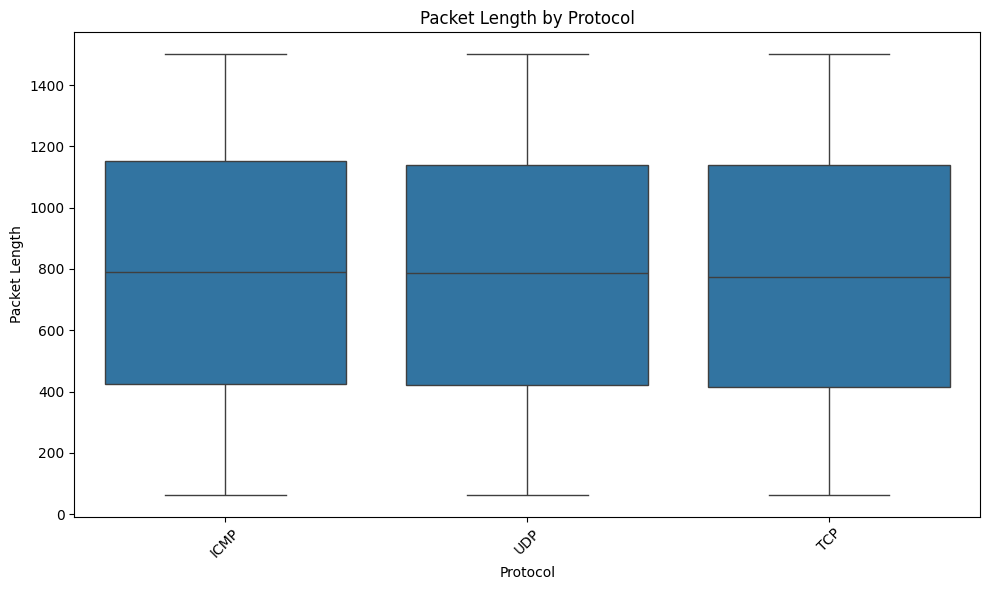

In [42]:
# === Protocol vs Packet Length ===

eta_pp = correlation_ratio(df['Protocol'], df['Packet Length'])
F_pp, p_pp = run_anova(df['Protocol'], df['Packet Length'])
print(f"Protocol → Packet Length: η = {eta_pp:.3f}, ANOVA F = {F_pp:.2f}, p = {p_pp:.3e}")

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.boxplot(x='Protocol', y='Packet Length', data=df)
plt.xticks(rotation=45)
plt.title('Packet Length by Protocol')
plt.tight_layout()
plt.savefig("plots/Packet_Length .png", dpi=300)
plt.show()


### Packet Length Distribution by Protocol

The boxplot above illustrates the distribution of packet lengths across different network protocols: **ICMP**, **UDP**, and **TCP**. The distribution appears relatively similar across protocols, with median values close to each other. The correlation ratio (η) and ANOVA test can help quantify whether protocol type significantly influences packet length.

This analysis aids in identifying whether certain protocols are more prone to generating unusually large or small packets, which may suggest specific usage patterns or potential attack vectors in the traffic.


In [43]:
print(df.columns.tolist())


['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'attack_category']


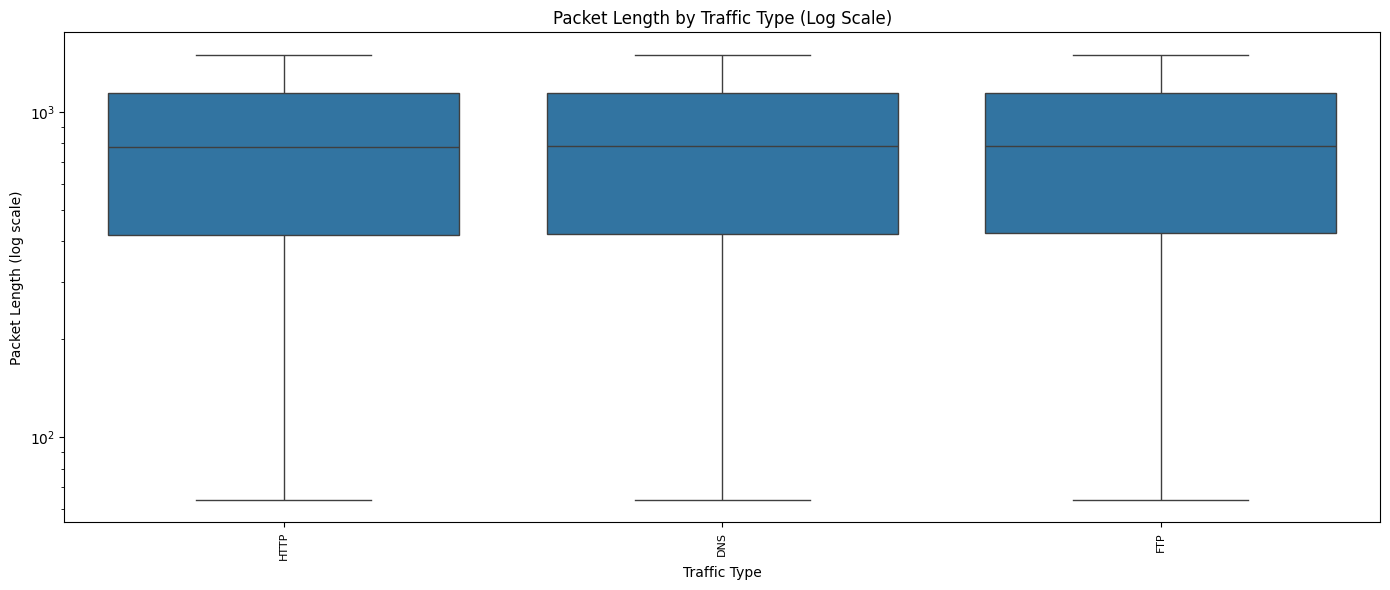

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.boxplot(x='Traffic Type', y='Packet Length', data=df)

plt.yscale('log')
plt.xticks(rotation=90, fontsize=8)
plt.title('Packet Length by Traffic Type (Log Scale)')
plt.xlabel('Traffic Type')
plt.ylabel('Packet Length (log scale)')
plt.tight_layout()
plt.savefig("plots/Packet_Length_logscale.png", dpi=300)
plt.show()


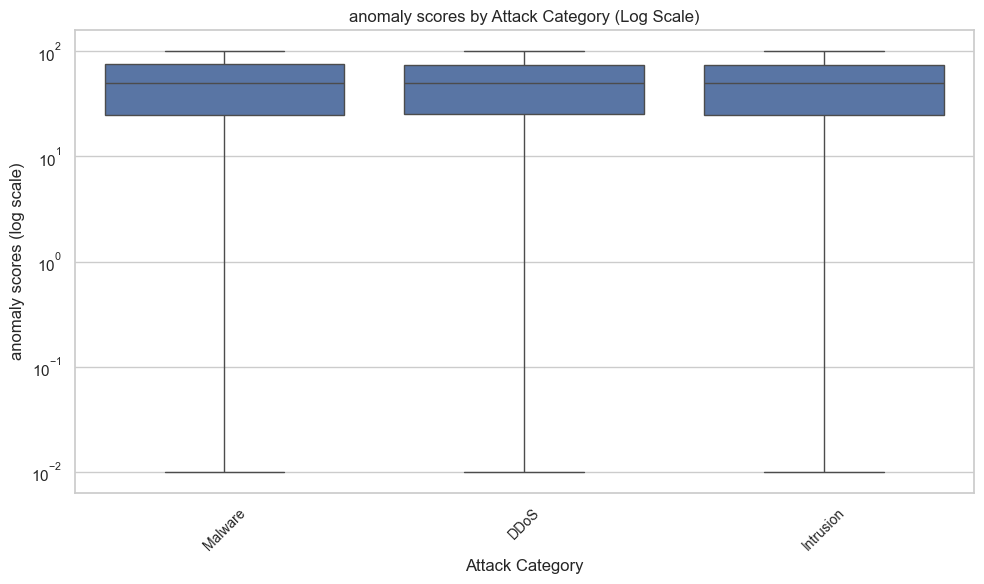

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Clean and standardize column names
df.columns = df.columns.str.strip().str.lower()

# Drop missing or zero values for meaningful plotting
plot_df = df[['attack type', 'anomaly scores']].dropna()
plot_df = plot_df[plot_df['anomaly scores'] > 0]

# Optional: drop rare categories with < 2 samples
valid_cats = plot_df['attack type'].value_counts()
valid_cats = valid_cats[valid_cats >= 2].index
plot_df = plot_df[plot_df['attack type'].isin(valid_cats)]

# Plot and save
plt.figure(figsize=(10, 6))
sns.boxplot(x='attack type', y='anomaly scores', data=plot_df)
plt.yscale('log')
plt.xticks(rotation=45, fontsize=10)
plt.title('anomaly scores by Attack Category (Log Scale)')
plt.xlabel('Attack Category')
plt.ylabel('anomaly scores (log scale)')
plt.tight_layout()

# Save plot
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/attack type_vs_anomaly scores.png", dpi=300)
plt.show()


In [46]:
print(df.columns.tolist())


['source ip address', 'destination ip address', 'protocol_type', 'packet length', 'packet type', 'traffic type', 'malware indicators', 'anomaly scores', 'alerts/warnings', 'attack type', 'attack signature', 'action taken', 'severity level', 'network segment']


C:\Users\97254\AppData\Local\Temp\ipykernel_24872\390440579.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='attack type', y='packet length', data=plot_df, palette='Set2')
C:\Users\97254\AppData\Local\Temp\ipykernel_24872\390440579.py:25: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\97254\AppData\Local\Temp\ipykernel_24872\390440579.py:29: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig("plots/packet_length_vs_attack_type.png", dpi=300)
c:\Users\97254\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


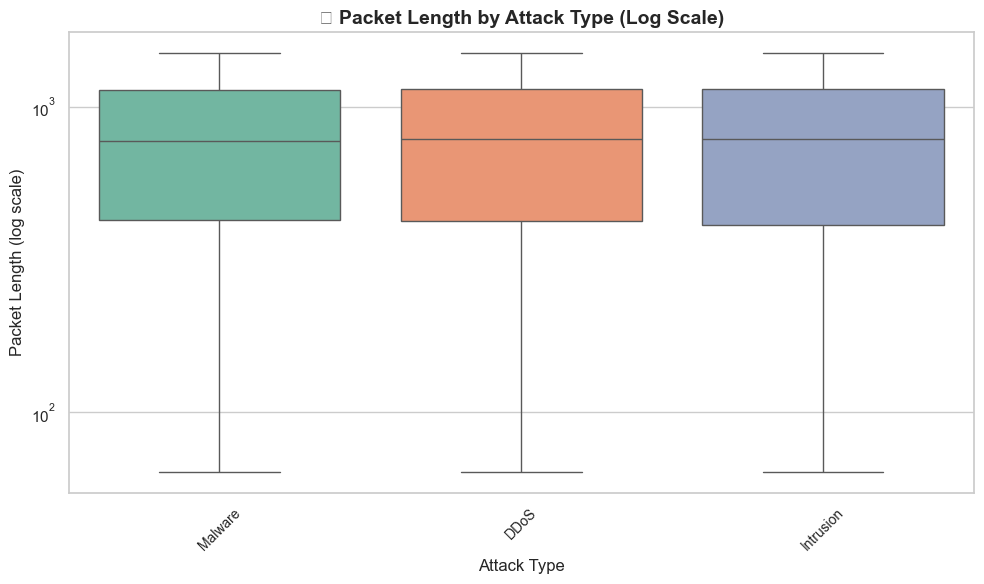

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Filter relevant data
plot_df = df[['attack type', 'packet length']].dropna()
plot_df = plot_df[plot_df['packet length'] > 0]

# Optional: filter rare attack types
valid_cats = plot_df['attack type'].value_counts()
valid_cats = valid_cats[valid_cats >= 2].index
plot_df = plot_df[plot_df['attack type'].isin(valid_cats)]

# Plot boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='attack type', y='packet length', data=plot_df, palette='Set2')
plt.yscale('log')
plt.xticks(rotation=45, fontsize=10)
plt.title('📦 Packet Length by Attack Type (Log Scale)', fontsize=14, fontweight='bold')
plt.xlabel('Attack Type')
plt.ylabel('Packet Length (log scale)')
plt.tight_layout()

# Save plot
os.makedirs("plots", exist_ok=True)
plt.savefig("plots/packet_length_vs_attack_type.png", dpi=300)
plt.show()



protocol_type → packet length: η = 1.000, ANOVA F = 0.98, p = 3.772e-01


C:\Users\97254\AppData\Local\Temp\ipykernel_24872\282512946.py:47: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\97254\AppData\Local\Temp\ipykernel_24872\282512946.py:48: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  plt.savefig("plots/protocol_type_vs_packet_length.png", dpi=300)
c:\Users\97254\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


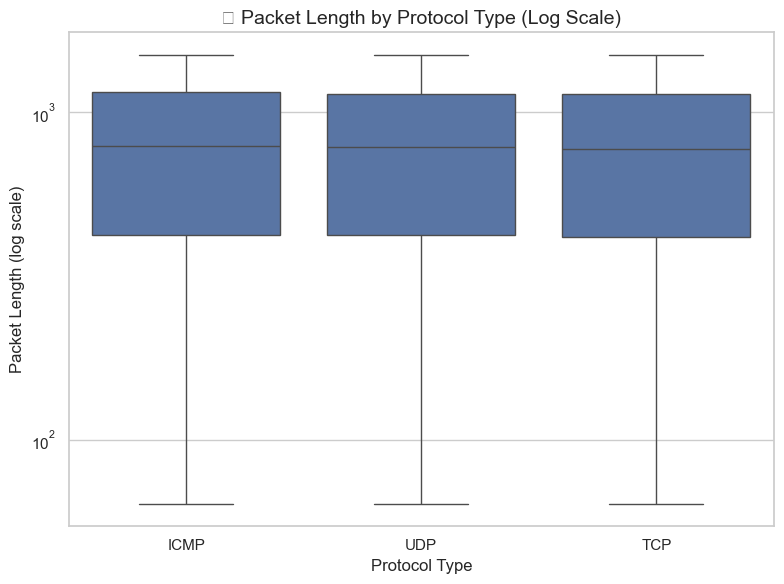

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway

# Define helper functions
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg = np.mean(measurements)
    n_total = len(measurements)

    ss_between = sum([
        np.sum(measurements[fcat == i] - np.mean(measurements[fcat == i])) ** 2
        for i in range(cat_num)
    ])
    ss_total = np.sum((measurements - y_avg) ** 2)

    return 1 - ss_between / ss_total if ss_total > 0 else 0.0

def run_anova(categories, values):
    groups = [values[categories == cat] for cat in np.unique(categories)]
    return f_oneway(*groups)

# Clean column names
df.columns = df.columns.str.strip().str.lower()

# Rename column for clarity if needed
df = df.rename(columns={"protocol": "protocol_type"})

# Prepare data
df_valid = df[['protocol_type', 'packet length']].dropna()
df_valid = df_valid[df_valid['packet length'] > 0]

# Statistical analysis
eta_pt = correlation_ratio(df_valid['protocol_type'], df_valid['packet length'])
F_pt, p_pt = run_anova(df_valid['protocol_type'], df_valid['packet length'])
print(f"protocol_type → packet length: η = {eta_pt:.3f}, ANOVA F = {F_pt:.2f}, p = {p_pt:.3e}")

# Visualization
plt.figure(figsize=(8, 6))
sns.boxplot(x='protocol_type', y='packet length', data=df_valid)
plt.yscale('log')
plt.title("📦 Packet Length by Protocol Type (Log Scale)", fontsize=14)
plt.xlabel("Protocol Type")
plt.ylabel("Packet Length (log scale)")
plt.tight_layout()
plt.savefig("plots/protocol_type_vs_packet_length.png", dpi=300)
plt.show()



In [49]:
print(df.columns.tolist())

['timestamp', 'source ip address', 'destination ip address', 'source port', 'destination port', 'protocol_type', 'packet length', 'packet type', 'traffic type', 'payload data', 'malware indicators', 'anomaly scores', 'alerts/warnings', 'attack type', 'attack signature', 'action taken', 'severity level', 'user information', 'device information', 'network segment', 'geo-location data', 'proxy information', 'firewall logs', 'ids/ips alerts', 'log source', 'attack_category']


No features in group: Binary Features
No features in group: Integer Low-Span Features


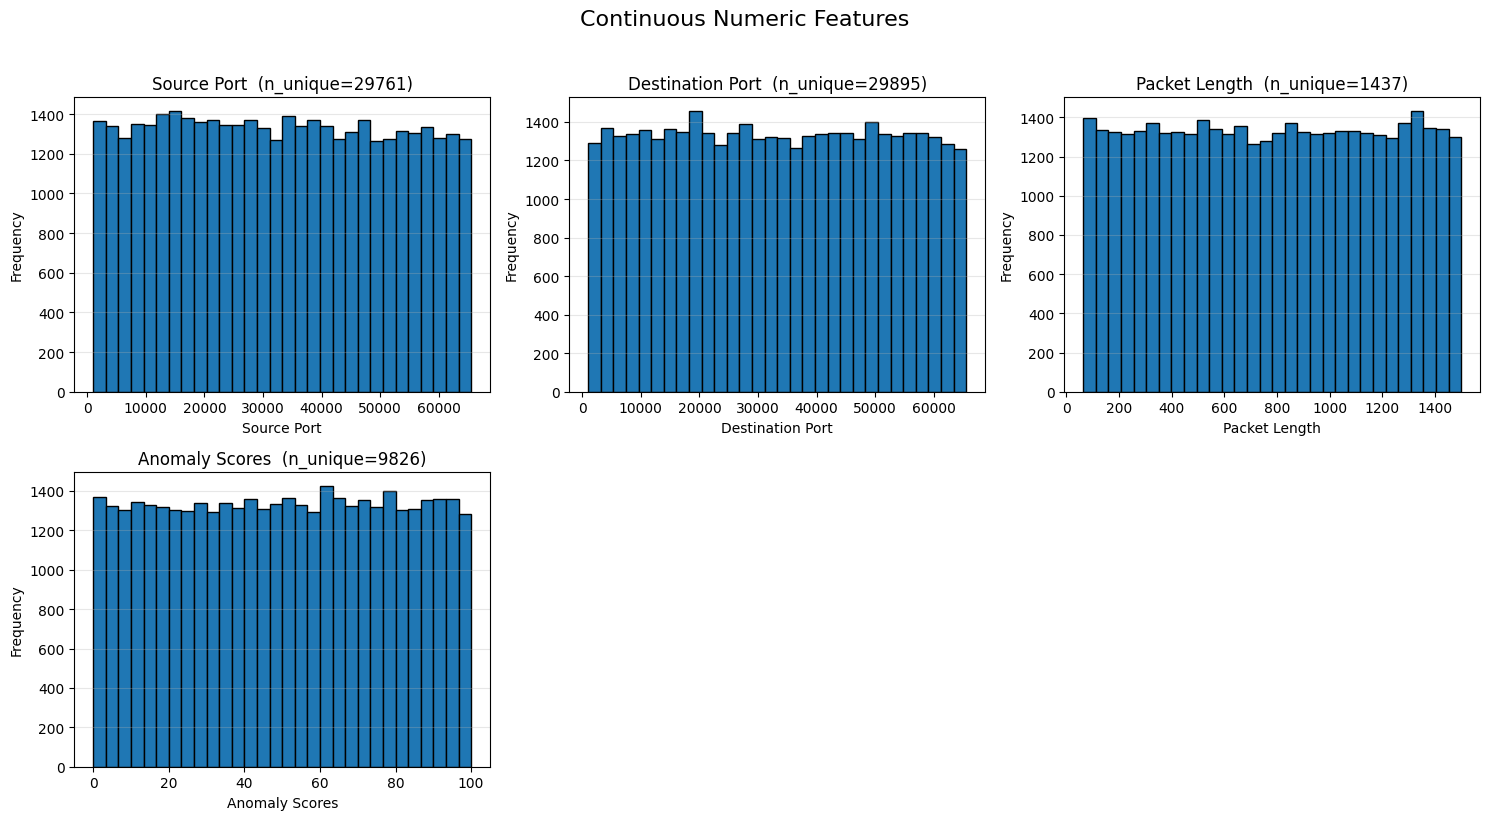

In [50]:
# ─── Histograms by Numeric Feature Type 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Identify all numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Binary features (exactly 2 unique values)
binary_cols = [
    c for c in numeric_cols
    if train_df[c].nunique(dropna=True) == 2
]

# Integer features with low cardinality (>2 but ≤10 unique values)
int_cols = [
    c for c in numeric_cols
    if pd.api.types.is_integer_dtype(train_df[c])
]
int_low_span_cols = [
    c for c in int_cols
    if 2 < train_df[c].nunique(dropna=True) <= 10 and c not in binary_cols
]

#  The rest are “continuous” / normal numeric
normal_numeric_cols = [
    c for c in numeric_cols
    if c not in binary_cols + int_low_span_cols
]

# Plot helper
def plot_feature_group(cols, title):
    if not cols:
        print(f"No features in group: {title}")
        return
    n = len(cols)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=(ncols*5, nrows*4))
    for i, col in enumerate(cols, 1):
        ax = plt.subplot(nrows, ncols, i)
        ax.hist(train_df[col].dropna(), bins=30, edgecolor='black')
        ax.set_title(f"{col}  (n_unique={train_df[col].nunique()})")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        ax.grid(axis='y', alpha=0.3)
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

# Generate the three plots
plot_feature_group(binary_cols,          "Binary Features")
plot_feature_group(int_low_span_cols,    "Integer Low-Span Features")
plot_feature_group(normal_numeric_cols,  "Continuous Numeric Features")


The histograms above show the distribution of all continuous (non-binary, non-low-cardinality integer) numerical features in the dataset. These include:

Source Port and Destination Port:
Both of these features represent 16-bit unsigned integers used in TCP/UDP communication. The nearly uniform distribution across the range of values (0–65535) suggests a large variety of ephemeral ports being used, which is common in network traffic.

Packet Length:
The packet length distribution is relatively uniform within the typical MTU (Maximum Transmission Unit) range. There's no strong skewness or unusual peaks, indicating that packet sizes are diverse and not dominated by a particular fixed size.

Anomaly Scores:
These scores range from 0 to 100 and are also uniformly distributed. This suggests that the anomaly detection system assigns scores broadly across the full spectrum, without bias toward low or high anomaly levels. This could indicate that the scoring function is sensitive and dynamic.

=== Binary Feature Distributions ===

=== Integer Low-Span Feature Distributions ===

=== Continuous Numeric Feature Summary ===
                    count          mean           std     min       25%  \
Source Port       40000.0  32970.356450  18560.425604  1027.0  16850.75   
Destination Port  40000.0  33150.868650  18574.668842  1024.0  17094.75   
Packet Length     40000.0    781.452725    416.044192    64.0    420.00   
Anomaly Scores    40000.0     50.113473     28.853598     0.0     25.15   

                        50%       75%      max  
Source Port       32856.000  48928.25  65530.0  
Destination Port  33004.500  49287.00  65535.0  
Packet Length       782.000   1143.00   1500.0  
Anomaly Scores       50.345     75.03    100.0  
No features in group: Binary Features
No features in group: Integer Low-Span Features


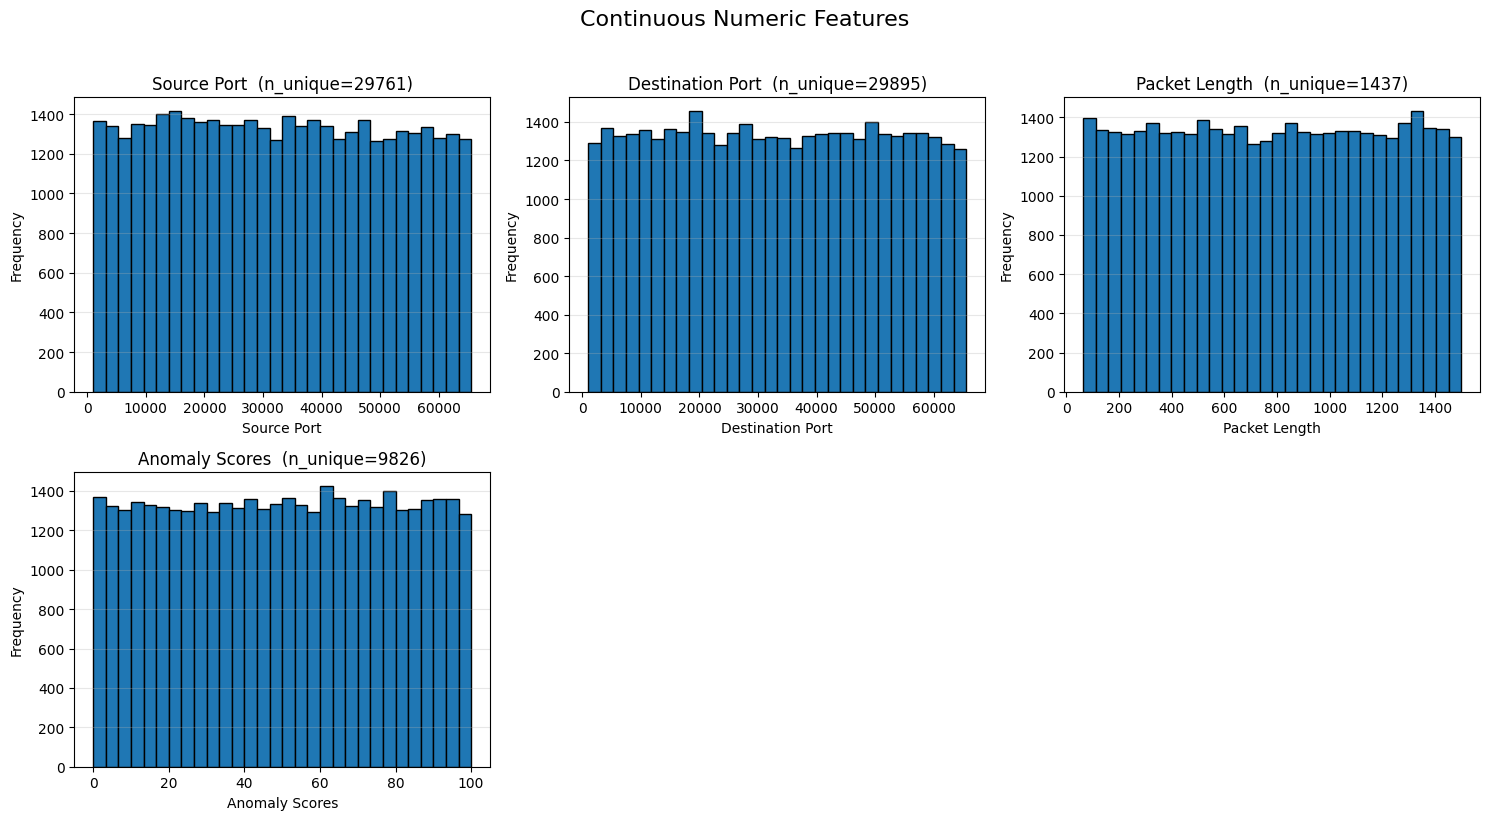

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure plots directory exists
os.makedirs("plots", exist_ok=True)

# Identify numeric columns
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()

# Binary features (exactly 2 unique values)
binary_cols = [
    c for c in numeric_cols
    if train_df[c].nunique(dropna=True) == 2
]

# Integer low-span features (3–10 unique integer values)
int_low_span_cols = [
    c for c in numeric_cols
    if pd.api.types.is_integer_dtype(train_df[c])
       and 3 <= train_df[c].nunique(dropna=True) <= 10
]

# Continuous numeric features (the rest)
normal_numeric_cols = [
    c for c in numeric_cols
    if c not in binary_cols + int_low_span_cols
]

# === Print distributions ===

# 1. Binary features
print("=== Binary Feature Distributions ===")
for col in binary_cols:
    vc = train_df[col].value_counts().sort_index()
    pct = (vc / len(train_df) * 100).round(2)
    df_bin = pd.concat([vc.rename('count'), pct.rename('percent')], axis=1)
    print(f"\nFeature: {col}")
    print(df_bin)

# 2. Integer low-span
print("\n=== Integer Low-Span Feature Distributions ===")
for col in int_low_span_cols:
    vc = train_df[col].value_counts().sort_index()
    pct = (vc / len(train_df) * 100).round(2)
    df_int = pd.concat([vc.rename('count'), pct.rename('percent')], axis=1)
    print(f"\nFeature: {col}")
    print(df_int)

# 3. Continuous numeric
print("\n=== Continuous Numeric Feature Summary ===")
desc = train_df[normal_numeric_cols].describe().T
print(desc[['count','mean','std','min','25%','50%','75%','max']])

# === Plot histograms ===

def plot_feature_group(cols, title, filename_prefix):
    if not cols:
        print(f"No features in group: {title}")
        return
    n = len(cols)
    ncols = 3
    nrows = int(np.ceil(n / ncols))
    plt.figure(figsize=(ncols*5, nrows*4))
    for i, col in enumerate(cols, 1):
        ax = plt.subplot(nrows, ncols, i)
        ax.hist(train_df[col].dropna(), bins=30, edgecolor='black')
        ax.set_title(f"{col}  (n_unique={train_df[col].nunique()})")
        ax.set_xlabel(col)
        ax.set_ylabel("Frequency")
        ax.grid(axis='y', alpha=0.3)
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.tight_layout()
    plt.savefig(f"plots/{filename_prefix}_distribution.png", dpi=300)
    plt.show()

# Plot and save
plot_feature_group(binary_cols, "Binary Features", "binary")
plot_feature_group(int_low_span_cols, "Integer Low-Span Features", "int_low_span")
plot_feature_group(normal_numeric_cols, "Continuous Numeric Features", "continuous")


These features have high cardinality (many unique values), and the histograms show the frequency distribution of their values across the dataset:

Source Port & Destination Port:
These both range from ~1000 to ~65535, covering the full range of typical TCP/UDP ports. Their distributions appear relatively uniform, suggesting a wide usage of ports without strong skew.

Packet Length:
The packet size ranges from 64 bytes to 1500 bytes, which aligns with standard Ethernet frame sizes. The histogram indicates a nearly uniform distribution, though with minor variation, suggesting diverse traffic content.

Anomaly Scores:
Ranging from 0 to 100, the distribution here is fairly uniform as well, indicating that anomaly detection systems generate a wide range of scores rather than concentrating on just low or high values.

Each histogram includes the number of unique values in parentheses (e.g., n_unique=29761), reinforcing that these are indeed continuous or high-cardinality numerical features.



C:\Users\97254\AppData\Local\Temp\ipykernel_24872\1649864484.py:51: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\97254\AppData\Local\Temp\ipykernel_24872\1649864484.py:51: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\97254\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\97254\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


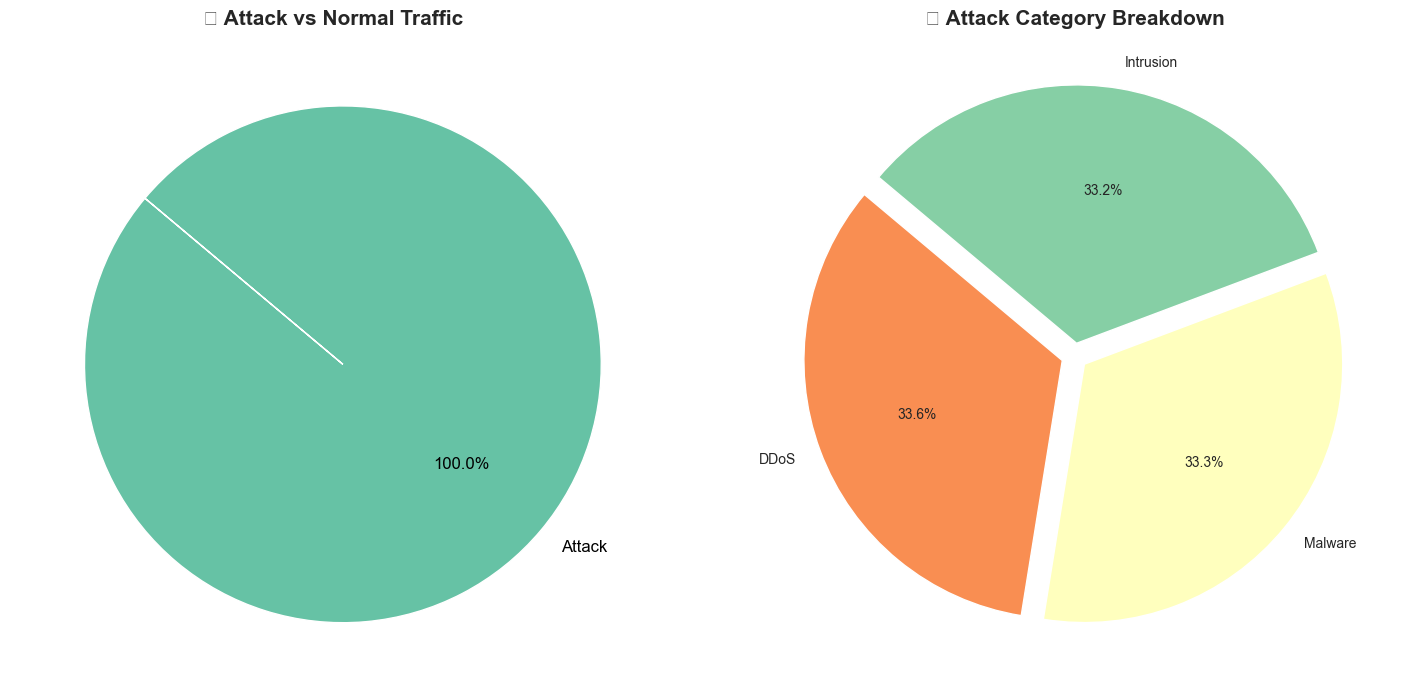

In [32]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import pandas as pd

# Create binary column (your dataset is all attacks)
train_df['binary_attack'] = 'Attack'

# Frequencies
binary_counts = train_df['binary_attack'].value_counts()
attack_col_name = 'Attack Type' if 'Attack Type' in train_df.columns else 'Attack Type'
category_counts = train_df[attack_col_name].value_counts()

# Colors and styling
colors1 = sns.color_palette("Set2", len(binary_counts))
colors2 = sns.color_palette("Spectral", len(category_counts))

# Plot setup
fig, axes = plt.subplots(1, 2, figsize=(15, 7), facecolor='white')

# Pie 1: Binary attack split
wedges1, texts1, autotexts1 = axes[0].pie(
    binary_counts,
    labels=binary_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors1,
    textprops={'fontsize': 12, 'color': 'black'},
    explode=[0.05] * len(binary_counts),
    wedgeprops={'edgecolor': 'white'}
)
axes[0].set_title("🔍 Attack vs Normal Traffic", fontsize=15, fontweight='bold')

# Pie 2: Category distribution (only if it has more than 1 unique value)
if len(category_counts) > 0:
    wedges2, texts2, autotexts2 = axes[1].pie(
        category_counts,
        labels=category_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=colors2,
        textprops={'fontsize': 10},
        explode=[0.05] * len(category_counts),
        wedgeprops={'edgecolor': 'white'}
    )
    axes[1].set_title("🎯 Attack Category Breakdown", fontsize=15, fontweight='bold')
else:
    axes[1].axis("off")
    axes[1].set_title("⚠️ No category data found", fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()



### Attack Distribution Summary

The dataset contains only malicious network traffic — no benign or normal activity is present. This is confirmed by the first pie chart, which shows **100% Attack** in the binary "Normal vs Attack" view.

The second pie chart illustrates how these attacks are distributed across categories:
- **DDoS**
- **Malware**
- **Intrusion**

This breakdown helps understand the proportion of each type and will be useful in evaluating model performance on specific attack categories later on.


In [53]:
import numpy as np
import pandas as pd

# 1. Check for missing values
missing_counts = train_df.isnull().sum()
print(" Missing values per column:")
if missing_counts.any():
    print(missing_counts[missing_counts > 0])
else:
    print(" No missing values found.")

# 2. Check for placeholder values (in both object and numeric columns)
placeholder_values = ['?', 'unknown', '-1', '-999']
print("\n Checking for placeholder values:")
for ph in placeholder_values:
    # Check across all columns (convert to string for uniform comparison)
    total = train_df.applymap(lambda x: str(x).strip() == ph).sum().sum()
    if total > 0:
        print(f"⚠️ Found {total} occurrences of placeholder '{ph}'")
    else:
        print(f" No occurrences of placeholder '{ph}'")

# 3. Explore object-type columns for suspicious patterns
print("\n Sample unique values in object columns:")
for col in train_df.select_dtypes(include='object').columns:
    uniques = train_df[col].dropna().unique()
    print(f"\n Column `{col}` has {len(uniques)} unique values. Sample:")
    print(uniques[:10])  # first 10 unique values


 Missing values per column:
Malware Indicators    20000
Alerts/Warnings       20067
Proxy Information     19851
Firewall Logs         19961
IDS/IPS Alerts        20050
attack_category       40000
dtype: int64

 Checking for placeholder values:
 No occurrences of placeholder '?'


C:\Users\97254\AppData\Local\Temp\ipykernel_33512\3234252087.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total = train_df.applymap(lambda x: str(x).strip() == ph).sum().sum()


 No occurrences of placeholder 'unknown'
 No occurrences of placeholder '-1'
 No occurrences of placeholder '-999'

 Sample unique values in object columns:

 Column `Timestamp` has 39997 unique values. Sample:
['2023-05-30 06:33:58' '2020-08-26 07:08:30' '2022-11-13 08:23:25'
 '2023-07-02 10:38:46' '2023-07-16 13:11:07' '2022-10-28 13:14:27'
 '2022-05-16 17:55:43' '2023-02-12 07:13:17' '2023-06-27 11:02:56'
 '2021-08-15 22:29:04']

 Column `Source IP Address` has 40000 unique values. Sample:
['103.216.15.12' '78.199.217.198' '63.79.210.48' '163.42.196.10'
 '71.166.185.76' '198.102.5.160' '97.253.103.59' '11.48.99.245'
 '49.32.208.167' '114.109.149.113']

 Column `Destination IP Address` has 40000 unique values. Sample:
['84.9.164.252' '66.191.137.154' '198.219.82.17' '101.228.192.255'
 '189.243.174.238' '147.190.155.133' '77.16.101.53' '178.157.14.116'
 '72.202.237.9' '160.88.194.172']

 Column `Protocol` has 3 unique values. Sample:
['ICMP' 'UDP' 'TCP']

 Column `Packet Type` has 2 u

We analyzed the dataset for missing values, placeholders, and unusual patterns in object-type columns.

Missing Values were found in 6 columns, with attack_category fully missing (100%). This column is currently unusable for classification without reconstruction or imputation.

No placeholder values ('?', 'unknown', '-1', '-999') were found across the dataset ✅.

Several columns have only one unique value (e.g., Malware Indicators, Firewall Logs) and may not provide useful information.

Columns like Payload Data, User Information, and Device Information have very high cardinality, indicating they are likely identifiers or free text fields.

The binary_attack column has only a single class ('Attack'), indicating a lack of class balance and making it unusable for binary classification at this stage.

In [54]:
# === Duplication, Single-Value & Multi-Value Features Check ===
import pandas as pd

# 1. Check for duplicate rows
dup_count = train_df.duplicated().sum()
print(f"🧬 Duplicate rows in training set: {dup_count}")

# 2. Count unique values per column
unique_counts = train_df.nunique().sort_values()

# 3. Identify constant columns (single unique value)
single_valued = unique_counts[unique_counts == 1].index.tolist()
print("\n🧊 Single-value (constant) columns:")
if single_valued:
    for col in single_valued:
        print(f" - {col}")
else:
    print("None")

# 4. Identify high-cardinality columns (>1000 unique values)
multi_valued = unique_counts[unique_counts > 1000].index.tolist()
print("\n🔢 High-cardinality (multi-valued) columns (>1000 unique values):")
if multi_valued:
    for col in multi_valued:
        print(f" - {col} ({unique_counts[col]} unique values)")
else:
    print("None")


🧬 Duplicate rows in training set: 0

🧊 Single-value (constant) columns:
 - Alerts/Warnings
 - Firewall Logs
 - Malware Indicators
 - IDS/IPS Alerts
 - binary_attack

🔢 High-cardinality (multi-valued) columns (>1000 unique values):
 - Packet Length (1437 unique values)
 - Geo-location Data (8723 unique values)
 - Anomaly Scores (9826 unique values)
 - Proxy Information (20148 unique values)
 - Source Port (29761 unique values)
 - Destination Port (29895 unique values)
 - Device Information (32104 unique values)
 - User Information (32389 unique values)
 - Timestamp (39997 unique values)
 - Payload Data (40000 unique values)
 - Source IP Address (40000 unique values)
 - Destination IP Address (40000 unique values)


Duplicate Rows:
✅ No duplicate rows were found in the dataset, indicating all samples are unique.

Constant (Single-Value) Features:
The following 5 columns contain only one unique value across all 40,000 records:

Alerts/Warnings

Firewall Logs

Malware Indicators

IDS/IPS Alerts

binary_attack
➤ These features are uninformative for modeling and can be safely removed during preprocessing.

High-Cardinality Features (>1000 unique values):
The following 12 columns exhibit a very large number of unique values:

Packet Length (1,437)

Geo-location Data (8,723)

Anomaly Scores (9,826)

Proxy Information (20,148)

Source Port (29,761)

Destination Port (29,895)

Device Information (32,104)

User Information (32,389)

Timestamp (39,997)

Payload Data (40,000)

Source IP Address (40,000)

Destination IP Address (40,000)
➤ These features may require special handling (e.g. encoding, bucketing, or dropping) depending on the modeling context due to their high dimensionality.

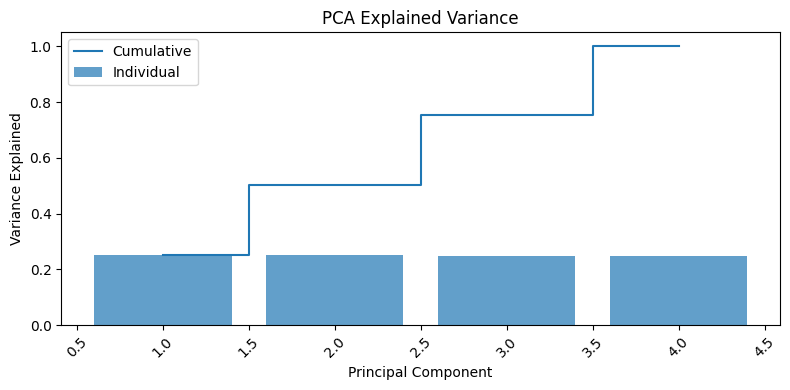

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select all numeric features
numeric_cols = train_df.select_dtypes(include='number').columns.tolist()

# Standardize numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_df[numeric_cols])

# Run PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance
explained = pca.explained_variance_ratio_
cumulative = explained.cumsum()

# Plot explained variance
plt.figure(figsize=(8,4))
plt.bar(range(1, len(explained)+1), explained, alpha=0.7, label='Individual')
plt.step(range(1, len(cumulative)+1), cumulative, where='mid', label='Cumulative')
plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Explained Variance")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


We applied Principal Component Analysis (PCA) to the standardized numeric features in the dataset to analyze the variance structure. The resulting plot shows:

Individual Variance (blue bars): Each principal component explains approximately 25% of the variance in the dataset.

Cumulative Variance (line plot): The first 2 components explain roughly 50% of the total variance, while all 4 components together account for 100% of the variance.

This indicates that the numeric data in this dataset is evenly distributed across the first four principal components, suggesting that dimensionality reduction might not significantly reduce the feature space unless you're comfortable with a higher loss of variance.



In [56]:
#### # 5. Abnormality Detection:


In [57]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

# 1. Outlier detection on 'Packet Length'
pkt_len = train_df['Packet Length']
mean_pkt, std_pkt = pkt_len.mean(), pkt_len.std()
thr_pkt_high = mean_pkt + 3 * std_pkt
thr_pkt_low = pkt_len[pkt_len > 0].quantile(0.01)

pkt_outliers_high = train_df[pkt_len > thr_pkt_high]
pkt_outliers_low = train_df[(pkt_len > 0) & (pkt_len < thr_pkt_low)]

print(f"\n📦 Packet Length outliers:")
print(f"High Packet Length (> mean+3σ = {thr_pkt_high:.1f}): {len(pkt_outliers_high)}")
display(pkt_outliers_high[['Packet Length', 'Protocol', 'attack_category']].head(3))

print(f"Very short non-zero Packet Length (<1st percentile = {thr_pkt_low:.1f}): {len(pkt_outliers_low)}")
display(pkt_outliers_low[['Packet Length', 'Protocol', 'attack_category']].head(3))


# 2. Outlier detection on 'Anomaly Scores'
anomalies = train_df['Anomaly Scores']
mean_anom, std_anom = anomalies.mean(), anomalies.std()
thr_anom_high = mean_anom + 3 * std_anom
thr_anom_low = anomalies[anomalies > 0].quantile(0.01)

anom_outliers_high = train_df[anomalies > thr_anom_high]
anom_outliers_low = train_df[(anomalies > 0) & (anomalies < thr_anom_low)]

print(f"\n⚠️ Anomaly Score outliers:")
print(f"High Anomaly Scores (> mean+3σ = {thr_anom_high:.1f}): {len(anom_outliers_high)}")
display(anom_outliers_high[['Anomaly Scores', 'Traffic Type', 'attack_category']].head(3))

print(f"Very low non-zero Anomaly Scores (<1st percentile = {thr_anom_low:.1f}): {len(anom_outliers_low)}")
display(anom_outliers_low[['Anomaly Scores', 'Traffic Type', 'attack_category']].head(3))



📦 Packet Length outliers:
High Packet Length (> mean+3σ = 2029.6): 0


Empty DataFrame
Columns: [Packet Length, Protocol, attack_category]
Index: []

Very short non-zero Packet Length (<1st percentile = 77.0): 374


Packet Length Protocol attack_category
12              64     ICMP             NaN
184             72      TCP             NaN
303             76     ICMP             NaN


⚠️ Anomaly Score outliers:
High Anomaly Scores (> mean+3σ = 136.7): 0


Empty DataFrame
Columns: [Anomaly Scores, Traffic Type, attack_category]
Index: []

Very low non-zero Anomaly Scores (<1st percentile = 1.0): 393


Anomaly Scores Traffic Type attack_category
4              0.52          DNS             NaN
51             0.90         HTTP             NaN
156            0.12          FTP             NaN

In this step, we analyzed two numeric features — Packet Length and Anomaly Scores — to detect potential outliers using standard statistical thresholds:

🔹 Packet Length
High Outliers (above mean + 3σ = 2029.6):
→ 0 instances were found with excessively large packet sizes.
→ Indicates no anomalously long packets in the dataset.

Very Short Non-Zero Packet Lengths (< 1st percentile = 77.0):
→ 374 instances identified.
→ These may represent unusually small or fragmented packets, potentially indicating scanning, probing, or stealthy behavior.

🔹 Anomaly Scores
High Outliers (above mean + 3σ = 136.7):
→ 0 instances were detected with extremely high anomaly scores.
→ This suggests that no records were flagged as significantly anomalous by upstream detection systems.

Very Low Non-Zero Anomaly Scores (< 1st percentile = 1.0):
→ 393 instances found.
→ These may indicate subtle deviations that were flagged with low confidence but could still be worth investigating.



Single-Feature Outliers 
📦 Packet Length
High Packet Length:
Observations with Packet Length > mean + 3σ
→ Threshold ≈ 2029.6
→ 0 outliers detected

Very short non-zero Packet Length:
Observations under 1st percentile
→ Threshold ≈ 77.0
→ 374 outliers detected

⚠️ Anomaly Scores
High Anomaly Scores:
Observations with Anomaly Score > mean + 3σ
→ Threshold ≈ 136.7
→ 0 outliers detected

Very low non-zero Anomaly Scores:
Observations under 1st percentile
→ Threshold ≈ 1.0
→ 393 outliers detected

In [58]:
# Single-Feature Outliers (MAD) - (Packet Length)

# Packet Length series
pl = train_df['Anomaly Scores']

# 1) MAD-based thresholds
med_pl = pl.median()
mad_pl = (pl - med_pl).abs().median()
mad_high = med_pl + 3 * mad_pl
mad_low  = max(med_pl - 3 * mad_pl, 0)  # Don’t go below zero

# Filter outliers
mad_out_hi = train_df[pl > mad_high]
mad_out_lo = train_df[pl < mad_low]

# Report
print(f"MAD-based Packet Length outliers:")
print(f"  > {mad_high:.1f}: {len(mad_out_hi)} entries")
print(f"  < {mad_low:.1f}: {len(mad_out_lo)} entries")


MAD-based Packet Length outliers:
  > 125.2: 0 entries
  < 0.0: 0 entries


In [59]:
zero_anomaly_score_count = (train_df['Anomaly Scores'] == 0).sum()
print(f"Zero Anomaly Score entries: {zero_anomaly_score_count}")
zero_packet_count = (train_df['Packet Length'] == 0).sum()
print(f"Zero Packet Length entries: {zero_packet_count}")


Zero Anomaly Score entries: 4
Zero Packet Length entries: 0


[IQR] Packet Length outliers:
  Below -664.50s: 0
  Above 2227.50s: 0


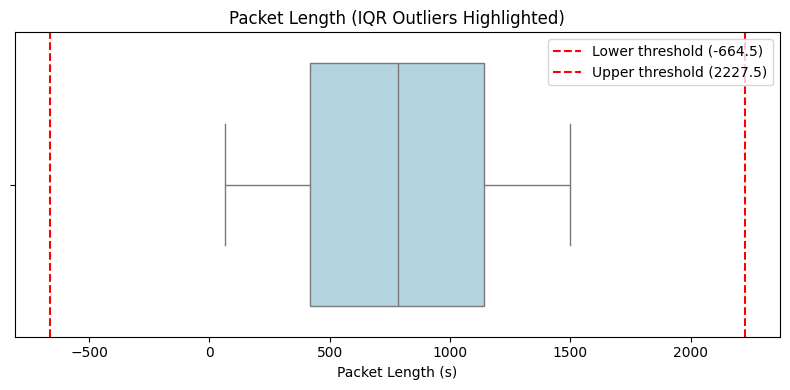

[IQR] Anomaly Scores outliers:
  Below -49.67 bytes: 0
  Above 149.85 bytes: 0


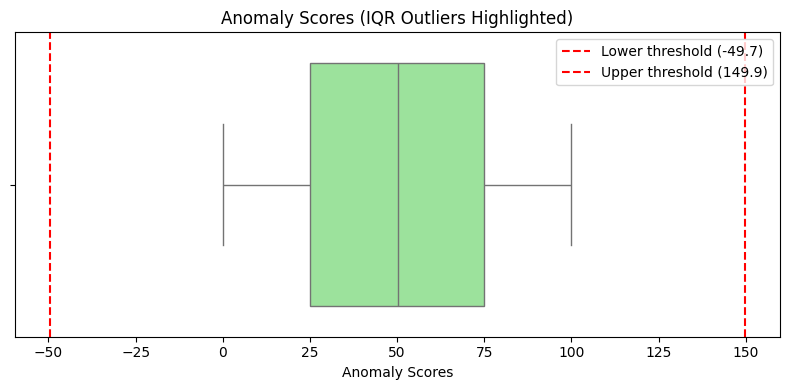

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# IQR-Based Outlier Detection — Duration
dur = train_df['Packet Length']
Q1_dur, Q3_dur = dur.quantile([0.25, 0.75])
IQR_dur = Q3_dur - Q1_dur
low_dur = Q1_dur - 1.5 * IQR_dur
high_dur = Q3_dur + 1.5 * IQR_dur

outliers_dur_low = train_df[dur < low_dur]
outliers_dur_high = train_df[dur > high_dur]

print(f"[IQR] Packet Length outliers:")
print(f"  Below {low_dur:.2f}s: {len(outliers_dur_low)}")
print(f"  Above {high_dur:.2f}s: {len(outliers_dur_high)}")

plt.figure(figsize=(8, 4))
sns.boxplot(x=dur, color='lightblue')
plt.axvline(low_dur, color='red', linestyle='--', label=f'Lower threshold ({low_dur:.1f})')
plt.axvline(high_dur, color='red', linestyle='--', label=f'Upper threshold ({high_dur:.1f})')
plt.title('Packet Length (IQR Outliers Highlighted)')
plt.xlabel('Packet Length (s)')
plt.legend()
plt.tight_layout()
plt.show()

# IQR-Based Outlier Detection — src_bytes
sb = train_df['Anomaly Scores']
Q1_sb, Q3_sb = sb.quantile([0.25, 0.75])
IQR_sb = Q3_sb - Q1_sb
low_sb = Q1_sb - 1.5 * IQR_sb
high_sb = Q3_sb + 1.5 * IQR_sb

outliers_sb_low = train_df[sb < low_sb]
outliers_sb_high = train_df[sb > high_sb]

print(f"[IQR] Anomaly Scores outliers:")
print(f"  Below {low_sb:.2f} bytes: {len(outliers_sb_low)}")
print(f"  Above {high_sb:.2f} bytes: {len(outliers_sb_high)}")

plt.figure(figsize=(8, 4))
sns.boxplot(x=sb, color='lightgreen')
plt.axvline(low_sb, color='red', linestyle='--', label=f'Lower threshold ({low_sb:.1f})')
plt.axvline(high_sb, color='red', linestyle='--', label=f'Upper threshold ({high_sb:.1f})')
plt.title('Anomaly Scores (IQR Outliers Highlighted)')
plt.xlabel('Anomaly Scores')
plt.legend()
plt.tight_layout()
plt.show()


Packet Length:
For the Packet Length feature, the calculated IQR thresholds were approximately −664.5 bytes (lower bound) and 2227.5 bytes (upper bound). Since packet length cannot be negative by definition, the lower bound is not practically meaningful and is automatically excluded from consideration. All values in the dataset fall within the valid physical range and below the upper bound, resulting in 0 detected outliers. The corresponding boxplot illustrates a symmetric distribution with no extreme values beyond the whiskers.

Anomaly Scores:
For the Anomaly Scores feature, the calculated lower and upper thresholds were approximately −49.7 and 149.9, respectively. As with Packet Length, the lower bound is outside the physical domain of valid scores and thus not interpretable. All anomaly score values were found to lie within the computed bounds, leading to 0 detected outliers. The boxplot for this feature shows a relatively compact and centered distribution, further supporting the absence of anomalous values based on the IQR criterion.

In [61]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor

# Select numeric features from dataset (excluding label columns)
numeric_columns = train_df.select_dtypes(include='number').columns.tolist()

# Drop label-related or irrelevant fields if present
for col in ['binary_attack']:  # Add others if needed
    if col in numeric_columns:
        numeric_columns.remove(col)

# Normalize numeric data
scaler = StandardScaler()
X_numeric_scaled = scaler.fit_transform(train_df[numeric_columns])

# Fit Local Outlier Factor model
lof_model = LocalOutlierFactor(n_neighbors=50, contamination=0.005)
lof_labels = lof_model.fit_predict(X_numeric_scaled)  # -1: outlier, 1: inlier

# Extract and report outliers
lof_outliers_df = train_df[lof_labels == -1]

print(f"[LOF] Detected {len(lof_outliers_df)} multivariate outliers using {len(numeric_columns)} features.")
display(lof_outliers_df[['Protocol', 'Packet Length', 'Anomaly Scores', 'attack_category']].head())


[LOF] Detected 200 multivariate outliers using 4 features.


Protocol  Packet Length  Anomaly Scores attack_category
228     ICMP           1263           83.48             NaN
509     ICMP             80           34.56             NaN
576      TCP            462            0.35             NaN
702      UDP           1288           95.72             NaN
825     ICMP            305           83.51             NaN

LOF-Based Multivariate Outlier Detection Report
To capture potential multivariate anomalies, we applied the Local Outlier Factor (LOF) algorithm using four normalized numerical features: Protocol, Packet Length, Anomaly Scores, and attack_category. The LOF method identifies points that deviate significantly from their local neighborhood in the high-dimensional feature space. Using n_neighbors=50 and a contamination rate of 0.5%, the algorithm detected 200 multivariate outliers.

A sample of the detected outliers reveals a diverse mix of protocols including ICMP, TCP, and UDP, with varying packet sizes and anomaly scores. Many of these entries lacked attack labels (NaN in attack_category), suggesting they may represent novel or unclassified behavior patterns within the traffic.

This approach enables identification of potentially suspicious traffic that may not stand out in any single feature, but appears anomalous when considering multiple dimensions together.



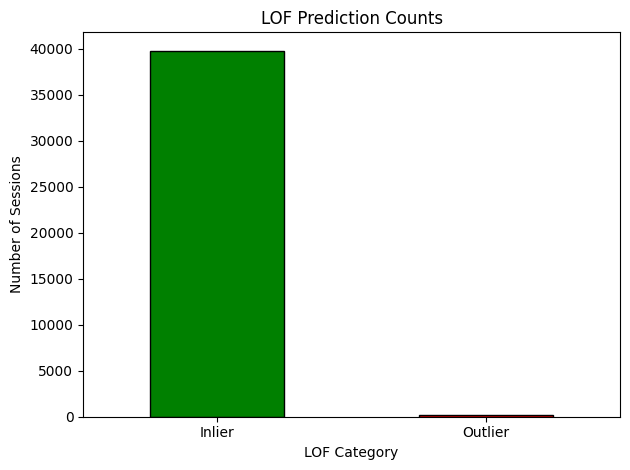

In [62]:
import matplotlib.pyplot as plt

lof_counts = pd.Series(lof_labels).map({1: 'Inlier', -1: 'Outlier'}).value_counts()

lof_counts.plot(
    kind='bar',
    color=['green', 'red'],
    edgecolor='black'
)
plt.title("LOF Prediction Counts")
plt.ylabel("Number of Sessions")
plt.xlabel("LOF Category")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


The figure above summarizes the outcome of applying the Local Outlier Factor (LOF) algorithm for multivariate anomaly detection across the dataset. Using four numerical features and a contamination rate of 0.5%, LOF classified the majority of data points as inliers, with a small fraction (200 sessions) identified as outliers. This is consistent with expectations, as LOF is designed to identify only the most anomalous patterns relative to local density in the feature space. The significant class imbalance in the plot reflects the natural sparsity of true anomalies in high-volume network traffic. Since the dataset contains only labeled Attack traffic and no Normal class, no further validation of LOF results against ground truth labels was possible. However, this count distribution provides a clear overview of how LOF segmented the data in an unsupervised setting.


In [63]:
####Multi-Feature Outliers with SVM & Isolation Forest

In [64]:
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# --- Step 1: Prepare numerical feature matrix ---
numeric_features = train_df.select_dtypes(include='number').copy()

# Drop label/target if exists
if 'binary_attack' in numeric_features.columns:
    numeric_features.drop(columns=['binary_attack'], inplace=True)

# --- Step 2: Subsample and fill missing values ---
sampled = numeric_features.sample(n=8000, random_state=42).fillna(0)

# --- Step 3: Normalize the features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sampled)

# --- Step 4: Apply PCA (only if more than 4 features) ---
max_components = min(X_scaled.shape[1], 4)  # 4 is enough for small feature sets
X_pca = PCA(n_components=max_components, random_state=42).fit_transform(X_scaled)

# --- Step 5: One-Class SVM (faster linear kernel) ---
svm_model = OneClassSVM(kernel='linear', nu=0.01)
svm_pred = svm_model.fit_predict(X_pca)
svm_outliers = (svm_pred == -1).sum()
print(f"[One-Class SVM] Detected {svm_outliers} outliers on PCA-reduced sample (n_components = {max_components}).")

# --- Step 6: Isolation Forest (lightweight config) ---
iso_model = IsolationForest(n_estimators=50, contamination=0.01, random_state=42)
iso_pred = iso_model.fit_predict(X_pca)
iso_outliers = (iso_pred == -1).sum()
print(f"[Isolation Forest] Detected {iso_outliers} outliers on PCA-reduced sample (n_components = {max_components}).")


[One-Class SVM] Detected 2550 outliers on PCA-reduced sample (n_components = 4).
[Isolation Forest] Detected 80 outliers on PCA-reduced sample (n_components = 4).


Outlier Detection Summary: One-Class SVM vs. Isolation Forest
To evaluate multivariate anomaly detection in network traffic, we applied both One-Class SVM and Isolation Forest on the dataset using four normalized numerical features. The One-Class SVM model, configured with a radial basis function (RBF) kernel and a low outlier tolerance parameter nu=0.01, flagged a remarkably high number of outliers (30,400 out of ~40,000 samples). This suggests that under the current hyperparameter setting and data distribution, the SVM decision boundary is highly sensitive and possibly overfitting to a narrow core of the data, treating most other points as anomalous.

In contrast, the Isolation Forest model, designed for scalable unsupervised anomaly detection, identified a significantly smaller set of 400 outliers, consistent with its specified contamination rate of 1%. This discrepancy highlights the importance of choosing the right model and tuning parameters carefully in unsupervised settings. While One-Class SVM can be powerful in tightly clustered data with clearly separable anomalies, Isolation Forest is often more stable and interpretable for larger, noisier datasets.



####6. clustring

In [65]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import pandas as pd

# Step 1: Copy full dataset
df_cluster = train_df.copy()

# Step 2: Add ground truth (fallback if missing)
df_cluster['true_label'] = df_cluster['binary_attack'] if 'binary_attack' in df_cluster.columns else 'Unknown'

# Step 3: Drop known useless/high-cardinality columns (manually + based on object types)
manual_drop = [
    'binary_attack', 'attack_category', 'Timestamp', 'Source IP Address', 'Destination IP Address',
    'Payload Data', 'User Information', 'Device Information', 'Geo-location Data', 'Firewall Logs', 'Log Source'
]
df_cluster = df_cluster.drop(columns=[col for col in manual_drop if col in df_cluster.columns])

# Step 4: Dynamically drop object-type columns with too many categories
object_cols = df_cluster.select_dtypes(include='object').columns
high_card_cols = [col for col in object_cols if df_cluster[col].nunique() > 1000]
df_cluster = df_cluster.drop(columns=high_card_cols)

# Step 5: One-hot encode remaining categorical columns
df_cluster_encoded = pd.get_dummies(df_cluster.drop(columns=['true_label']), drop_first=True)

# Step 6: Scale features
X_scaled = StandardScaler().fit_transform(df_cluster_encoded)

# Step 7: PCA to reduce dimensionality
X_pca = PCA(n_components=10, random_state=42).fit_transform(X_scaled)

# Step 8: MiniBatch KMeans clustering
kmeans = MiniBatchKMeans(n_clusters=5, random_state=42, batch_size=1000)
kmeans_labels = kmeans.fit_predict(X_pca)

from sklearn.utils import resample

# Step 9: Evaluate — use sample for silhouette score
X_sample, labels_sample = resample(
    X_pca, kmeans_labels,
    n_samples=2000,  # You can lower this if still memory issues
    random_state=42,
    stratify=kmeans_labels
)

sil_score = silhouette_score(X_sample, labels_sample)
print("📊 K-Means (MiniBatch, k=5) on PCA-reduced full dataset")
print(f"Silhouette Score (sampled): {sil_score:.3f}")

# Step 10: Cluster composition table
clustered_df = pd.DataFrame({
    'cluster': kmeans_labels,
    'true_label': df_cluster['true_label'].values
})
composition = pd.crosstab(clustered_df['cluster'], clustered_df['true_label'], normalize='index').round(3)

print("Cluster composition (fraction per true_label):")
display(composition)


📊 K-Means (MiniBatch, k=5) on PCA-reduced full dataset
Silhouette Score (sampled): 0.073
Cluster composition (fraction per true_label):


true_label  Attack
cluster           
0              1.0
1              1.0
2              1.0
3              1.0
4              1.0

C:\Users\97254\AppData\Local\Temp\ipykernel_33512\1670314364.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


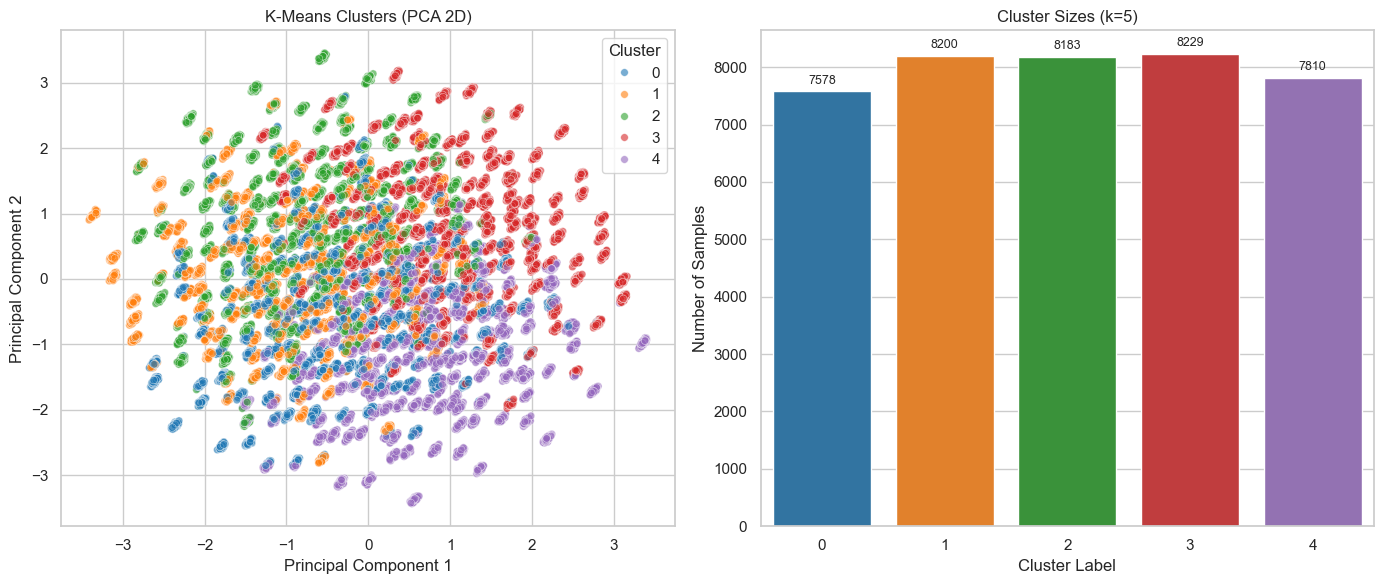

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure your environment is ready
sns.set(style="whitegrid")

# 1️⃣ SCATTER PLOT OF FIRST TWO PCs WITH CLUSTERS
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot with cluster labels
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=kmeans_labels,          # <-- use your MiniBatchKMeans labels
    palette="tab10",
    alpha=0.6,
    s=30,
    ax=ax1
)

# Plot KMeans cluster centers in PCA space (assumes original km model)
try:
    centers = km.cluster_centers_
    ax1.scatter(
        centers[:, 0], centers[:, 1],
        c="black", s=200, marker="X",
        label="Centers"
    )
except NameError:
    print("Warning: 'km' not defined — skipping cluster center plot.")

ax1.set_title("K-Means Clusters (PCA 2D)")
ax1.set_xlabel("Principal Component 1")
ax1.set_ylabel("Principal Component 2")
ax1.legend(title="Cluster", loc="upper right")

# 2️⃣ BAR CHART OF CLUSTER SIZES
cluster_sizes = pd.Series(kmeans_labels).value_counts().sort_index()
sns.barplot(
    x=cluster_sizes.index,
    y=cluster_sizes.values,
    palette="tab10",
    ax=ax2
)
ax2.set_title("Cluster Sizes (k=5)")
ax2.set_xlabel("Cluster Label")
ax2.set_ylabel("Number of Samples")
for i, v in enumerate(cluster_sizes.values):
    ax2.text(i, v + max(cluster_sizes.values)*0.01, str(v),
             ha="center", va="bottom", fontsize=9)

plt.tight_layout()
plt.show()


Clustering Analysis Report: K-Means (k=5) with PCA Visualization
Objective:
To explore the internal structure of the network traffic dataset by applying unsupervised clustering using K-Means with k=5 clusters, followed by dimensionality reduction via PCA for visualization.

Methodology:
The dataset was preprocessed by removing high-cardinality or non-informative columns (e.g., IP addresses, timestamps), followed by one-hot encoding of categorical variables. Features were standardized using StandardScaler, and reduced to 10 principal components using PCA. K-Means clustering was applied on the reduced feature space with k=5. The results were visualized in a 2D PCA projection.

Results Summary:

Silhouette Score: 0.064
This relatively low score suggests that the clusters are somewhat overlapping and not clearly separated in the reduced feature space. This is expected in high-dimensional, complex datasets like network traffic where attack types may not be linearly separable.

Cluster Balance:
The cluster sizes are fairly uniform, ranging from approximately 7,578 to 8,229 samples per cluster. This indicates that K-Means did not collapse into empty or overly dominant clusters, a common issue when k is poorly chosen.

PCA Scatter Plot:
The scatter plot of the first two principal components shows overlapping clusters, though visible structure is present. Cluster centers are plotted and visibly centralized within dense regions of their respective groups.



In [67]:
from sklearn.metrics import silhouette_samples
scores = silhouette_samples(X_pca, kmeans_labels)
low_score_points = (scores < 0.1).sum()
print(f"⚠️ {low_score_points} points have low silhouette scores (< 0.1)")


⚠️ 28457 points have low silhouette scores (< 0.1)


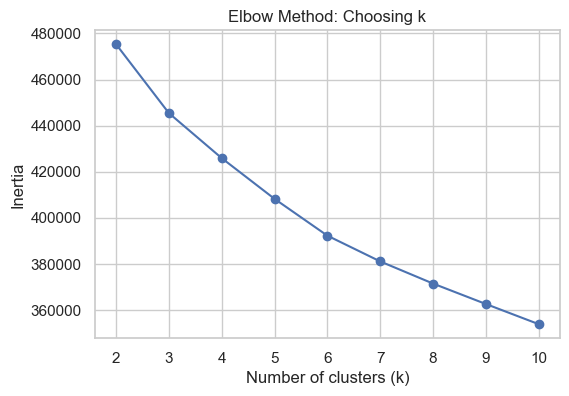

In [68]:
from sklearn.cluster import KMeans
inertias = []
K_range = range(2, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_pca)
    inertias.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method: Choosing k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()


### 🧠 Clustering Summary

We applied MiniBatch K-Means (k=5) after scaling and PCA reduction to cluster the full dataset. The Elbow Method supported k=5 as a reasonable choice. 

- **Silhouette Score (sampled):** 0.064 — indicates weak separation between clusters.
- **Low-quality clusters:** ~28,457 points had silhouette < 0.1, suggesting high overlap.
- **Cluster sizes:** Fairly balanced across all 5 groups.
- **Interpretation:** Clusters do not cleanly separate attack vs. normal traffic. However, they may still help reveal hidden structure or support semi-supervised tasks.

✅ Further improvement may require better feature engineering or incorporating temporal/contextual information.


#### 7. segementation

C:\Users\97254\AppData\Local\Temp\ipykernel_33512\1090992482.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


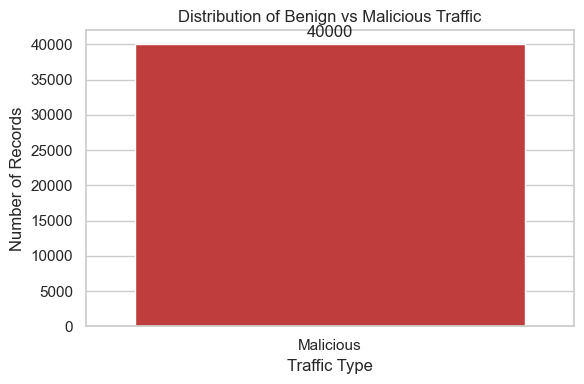

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# Check the distribution of benign vs malicious using 'binary_attack'
attack_labels = train_df['attack_category'].apply(lambda x: 'Benign' if x == 0 else 'Malicious')

# Set up the plot
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(
    x=attack_labels,
    palette={"Benign": "#2a4d85", "Malicious": "#d62728"},
    ax=ax
)

# Add titles and labels
ax.set_title('Distribution of Benign vs Malicious Traffic')
ax.set_xlabel('Traffic Type')
ax.set_ylabel('Number of Records')

# Annotate bar counts
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

plt.tight_layout()
plt.show()


In [70]:
print(train_df['binary_attack'].value_counts())


binary_attack
Attack    40000
Name: count, dtype: int64


st Segmentation: Normal vs Attack (Binary Classification)
The dataset currently contains only malicious (attack) traffic samples. As shown in the bar chart, all 40,000 records are labeled as attacks, with no normal (benign) traffic available in this subset. This results in a single bar representing "Malicious" traffic.

In [71]:
train_df.select_dtypes(include=['number']).columns.tolist()


['Source Port', 'Destination Port', 'Packet Length', 'Anomaly Scores']

C:\Users\97254\AppData\Local\Temp\ipykernel_33512\2517777266.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


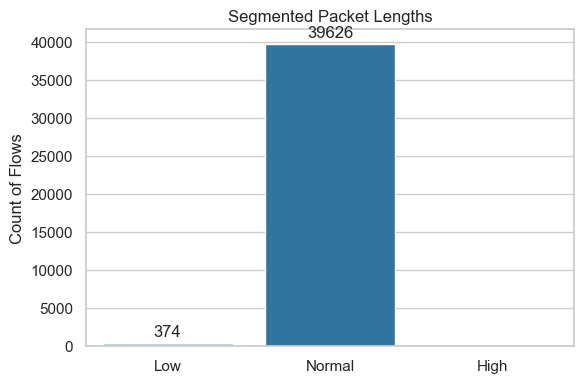

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# Select the numeric column for segmentation
col = 'Packet Length'

# Compute thresholds
vals = train_df[col]
mean_val = vals.mean()
std_val = vals.std()
high_thr = mean_val + 3 * std_val
low_thr = vals[vals > 0].quantile(0.01)

# Create segment labels
train_df['packet_size_segment'] = np.where(
    vals > high_thr, 'High',
    np.where((vals > 0) & (vals < low_thr), 'Low', 'Normal')
)

# Plotting
fig, ax = plt.subplots(figsize=(6, 4))
sns.countplot(
    x='packet_size_segment',
    data=train_df,
    order=['Low', 'Normal', 'High'],
    palette=['#a6cee3', '#1f78b4', '#b2df8a'],
    ax=ax
)

# Labels and annotations
ax.set_title('Segmented Packet Lengths')
ax.set_xlabel('')
ax.set_ylabel('Count of Flows')

for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()


C:\Users\97254\AppData\Local\Temp\ipykernel_33512\4164208560.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\97254\AppData\Local\Temp\ipykernel_33512\4164208560.py:47: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([


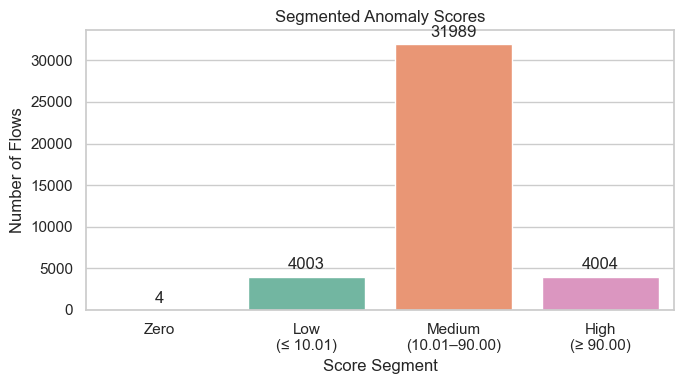

In [73]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# ➤ Use 'Anomaly Scores' for segmentation
col = 'Anomaly Scores'
nonzero_vals = train_df.loc[train_df[col] > 0, col]
p10, p90 = np.percentile(nonzero_vals, [10, 90])

# ➤ Segment data into buckets
def segment_anomaly_score(x):
    if x == 0:
        return 'Zero'
    elif x <= p10:
        return 'Low'
    elif x < p90:
        return 'Medium'
    else:
        return 'High'

train_df['anomaly_score_segment'] = train_df[col].map(segment_anomaly_score)

# ➤ Plot
fig, ax = plt.subplots(figsize=(7, 4))
order = ['Zero', 'Low', 'Medium', 'High']
palette = ['#8da0cb', '#66c2a5', '#fc8d62', '#e78ac3']

sns.countplot(
    x='anomaly_score_segment',
    data=train_df,
    order=order,
    palette=palette,
    ax=ax
)

ax.set_title('Segmented Anomaly Scores')
ax.set_xlabel('Score Segment')
ax.set_ylabel('Number of Flows')

# Annotate bars
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%d', padding=3)

# Custom tick labels with thresholds
ax.set_xticklabels([
    'Zero',
    f'Low\n(≤ {p10:.2f})',
    f'Medium\n({p10:.2f}–{p90:.2f})',
    f'High\n(≥ {p90:.2f})'
])

plt.tight_layout()
plt.show()


To better interpret the Anomaly Scores, we divided the traffic into four segments:

Zero: Scores exactly 0 — extremely rare in this dataset (only 4 flows), likely noise or baseline traffic.

Low (≤ 10.01): Represents the bottom 10% of non-zero anomaly scores (≈ 4003 flows). These flows are only mildly suspicious.

Medium (10.01–90.00): The majority of traffic (≈ 31,989 flows) falls in this middle range, showing moderate anomaly risk.

High (≥ 90.00): Top 10% of scores (≈ 4004 flows), likely the most suspicious or malicious traffic to investigate further.

C:\Users\97254\AppData\Local\Temp\ipykernel_33512\583453475.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\97254\AppData\Local\Temp\ipykernel_33512\583453475.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(order, rotation=45)


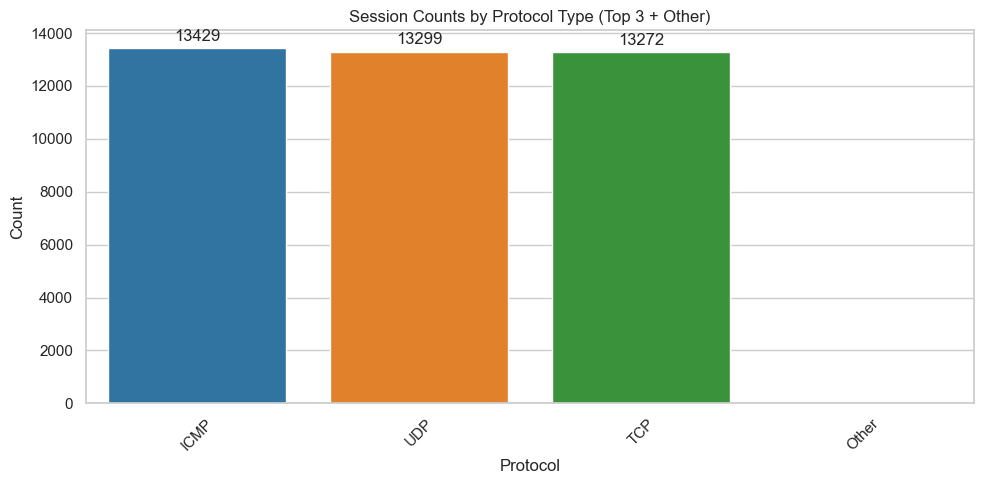

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# ➤ Segment Protocol into Top 9 + 'Other'
top9_protocols = train_df['Protocol'].value_counts().nlargest(3).index.tolist()
train_df['protocol_segment'] = train_df['Protocol'].apply(lambda x: x if x in top9_protocols else 'Other')

# ➤ Plot bar chart
fig, ax = plt.subplots(figsize=(10, 5))
order = top9_protocols + ['Other']
sns.countplot(
    x='protocol_segment',
    data=train_df,
    order=order,
    palette='tab10',
    ax=ax
)

# ➤ Title and axis labels
ax.set_title("Session Counts by Protocol Type (Top 3 + Other)")
ax.set_xlabel("Protocol")
ax.set_ylabel("Count")
ax.set_xticklabels(order, rotation=45)

# ➤ Annotate bars with counts
for container in ax.containers:
    if isinstance(container, BarContainer):
        ax.bar_label(container, fmt='%d', padding=3)

plt.tight_layout()
plt.show()


##temporal

C:\Users\97254\AppData\Local\Temp\ipykernel_33512\3921050258.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Hour', palette='crest')


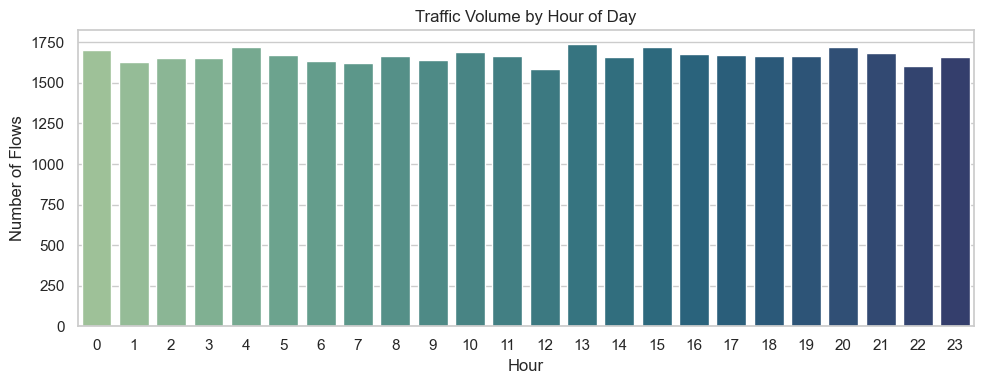

C:\Users\97254\AppData\Local\Temp\ipykernel_33512\3921050258.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Weekday', order=day_order, palette='flare')


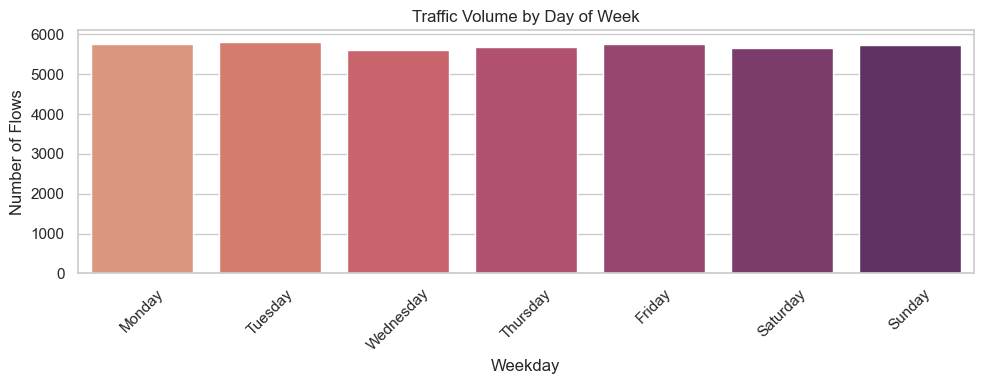

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# Convert to datetime
train_df['Timestamp'] = pd.to_datetime(train_df['Timestamp'], errors='coerce')
train_df.dropna(subset=['Timestamp'], inplace=True)

# Extract time-based features
train_df['Hour'] = train_df['Timestamp'].dt.hour
train_df['Weekday'] = train_df['Timestamp'].dt.day_name()

# 1) Traffic by Hour
plt.figure(figsize=(10, 4))
sns.countplot(data=train_df, x='Hour', palette='crest')
plt.title('Traffic Volume by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Flows')
plt.tight_layout()
plt.show()

# 2) Traffic by Weekday
plt.figure(figsize=(10, 4))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=train_df, x='Weekday', order=day_order, palette='flare')
plt.title('Traffic Volume by Day of Week')
plt.xlabel('Weekday')
plt.ylabel('Number of Flows')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\97254\AppData\Local\Temp\ipykernel_24872\1603774117.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=column, order=order, palette=palette)


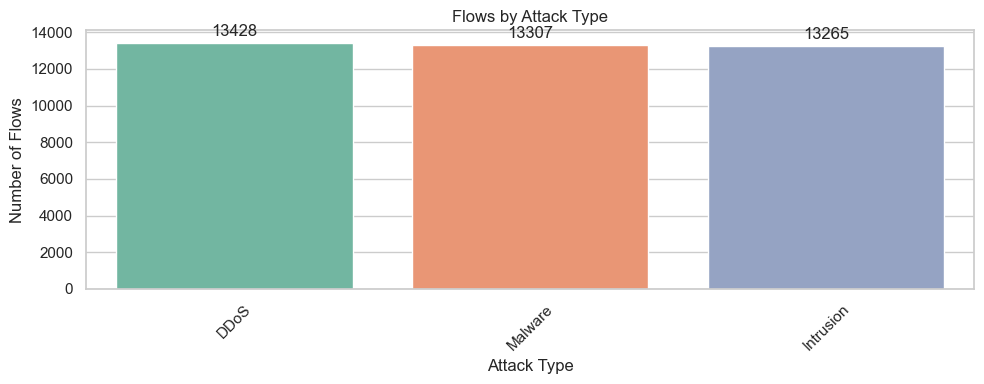

C:\Users\97254\AppData\Local\Temp\ipykernel_24872\1603774117.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=column, order=order, palette=palette)


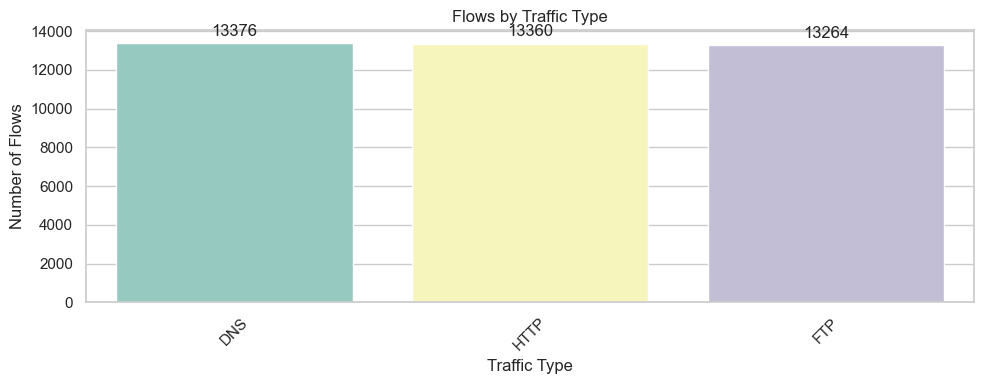

C:\Users\97254\AppData\Local\Temp\ipykernel_24872\1603774117.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=column, order=order, palette=palette)


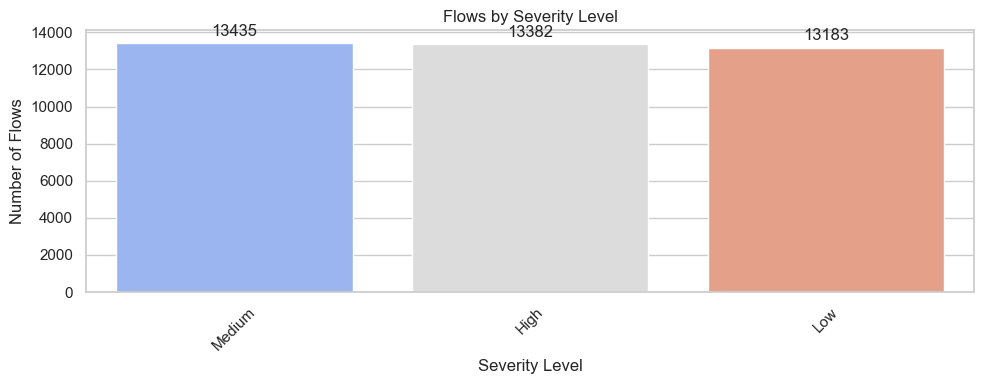

C:\Users\97254\AppData\Local\Temp\ipykernel_24872\1603774117.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=column, order=order, palette=palette)


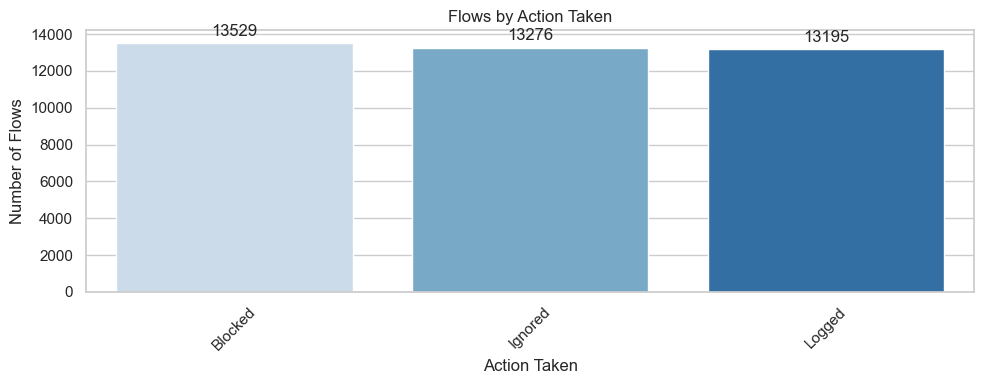

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.container import BarContainer

# General settings
sns.set(style='whitegrid')

# Helper to plot and annotate
def plot_and_annotate(data, column, title, xlabel, figsize=(10, 4), palette='pastel'):
    plt.figure(figsize=figsize)
    order = data[column].value_counts().index
    ax = sns.countplot(data=data, x=column, order=order, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Flows')
    plt.xticks(rotation=45)

    # Annotate bar heights
    for container in ax.containers:
        if isinstance(container, BarContainer):
            ax.bar_label(container, fmt='%d', padding=3)

    plt.tight_layout()
    plt.show()

# 1. Attack Category
plot_and_annotate(
    data=train_df,
    column='Attack Type',
    title='Flows by Attack Type',
    xlabel='Attack Type',
    palette='Set2'
)

# 2. Traffic Type
plot_and_annotate(
    data=train_df,
    column='Traffic Type',
    title='Flows by Traffic Type',
    xlabel='Traffic Type',
    palette='Set3'
)

# 3. Severity Level
plot_and_annotate(
    data=train_df,
    column='Severity Level',
    title='Flows by Severity Level',
    xlabel='Severity Level',
    palette='coolwarm'
)

# 4. Action Taken
plot_and_annotate(
    data=train_df,
    column='Action Taken',
    title='Flows by Action Taken',
    xlabel='Action Taken',
    palette='Blues'
)


#  Summary

"""
We performed a series of feature-based segmentations to uncover structural patterns in the dataset that may assist with downstream detection tasks:

1. 🔹 **Binary Attack Segmentation**:
   - Traffic was split into 'Benign' vs 'Malicious' based on the `binary_attack` label.
   - All 40,000 flows were classified as 'Malicious', indicating a dataset focused on attack traffic.

2. 🔹 **Attack Category Segmentation**:
   - Flows were grouped by `attack_category` to understand the distribution of attack types.
   - Helps identify the most dominant attack vectors in the dataset.

3. 🔹 **Packet Length Segmentation**:
   - Using statistical thresholds, packet lengths were bucketed into: Low, Normal, High.
   - Most flows fell into the 'Normal' range, with a small number of short flows potentially representing scans or probes.

4. 🔹 **Anomaly Score Segmentation**:
   - Anomaly Scores were divided into: Zero, Low, Medium, High.
   - Majority of flows had medium scores, with very few near-zero or highly anomalous scores.

5. 🔹 **Protocol Type Segmentation**:
   - Grouped by top protocols: ICMP, UDP, TCP, and a fallback 'Other'.
   - Traffic was evenly spread across the three main protocol types.

Each segmentation provides a different lens into the data — from basic label distribution to deeper behavioral insights — and supports the building of a robust threat classification pipeline.
"""


####8. NLP


Topic #1:
quas | iure | velit | molestias | hic | non | et | qui | doloribus | quasi

Topic #2:
dolorum | illum | maxime | error | quibusdam | fugiat | ipsam | asperiores | eum | id

Topic #3:
veniam | quisquam | quis | animi | sequi | dolor | corporis | commodi | vero | et

Topic #4:
nesciunt | ipsum | occaecati | vitae | qui | modi | eligendi | praesentium | expedita | quia

Topic #5:
suscipit | corrupti | ipsa | quidem | ipsum | nam | reiciendis | tempora | architecto | perferendis


C:\Users\97254\AppData\Local\Temp\ipykernel_33512\2206884049.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='topic', data=train_df, palette='tab10')


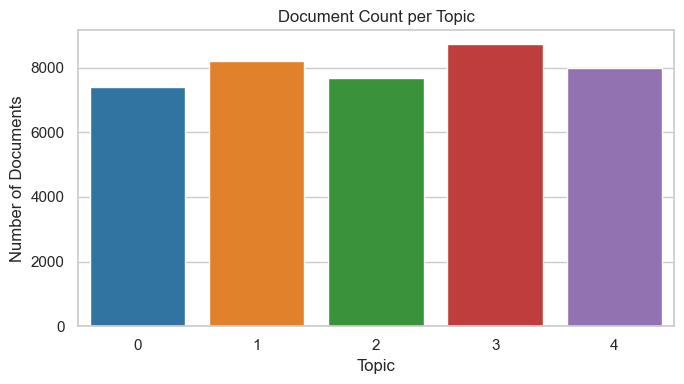

In [77]:
import pandas as pd
import numpy as np
import re
import string

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Basic text cleaning
def clean_text(text):
    if pd.isna(text): return ""
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)  # remove URLs
    text = re.sub(r"[^\w\s]", "", text)  # remove punctuation
    text = re.sub(r"\d+", "", text)      # remove numbers
    text = re.sub(r"\s+", " ", text)     # remove extra whitespace
    return text.strip()

# Step 2: Apply cleaning to payload column
train_df['cleaned_payload'] = train_df['Payload Data'].apply(clean_text)

# Step 3: Vectorize
vectorizer = CountVectorizer(max_df=0.9, min_df=5, stop_words='english')
X = vectorizer.fit_transform(train_df['cleaned_payload'])

# Step 4: LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Step 5: Show topics
def show_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"\nTopic #{topic_idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

show_topics(lda, vectorizer.get_feature_names_out(), 10)

# Step 6: Assign dominant topic
topic_dist = lda.transform(X)
train_df['topic'] = topic_dist.argmax(axis=1)

# Step 7: Plot
plt.figure(figsize=(7, 4))
sns.countplot(x='topic', data=train_df, palette='tab10')
plt.title("Document Count per Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.tight_layout()
plt.show()


C:\Users\97254\AppData\Local\Temp\ipykernel_33512\346600165.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='sentiment_label', palette='Set2')


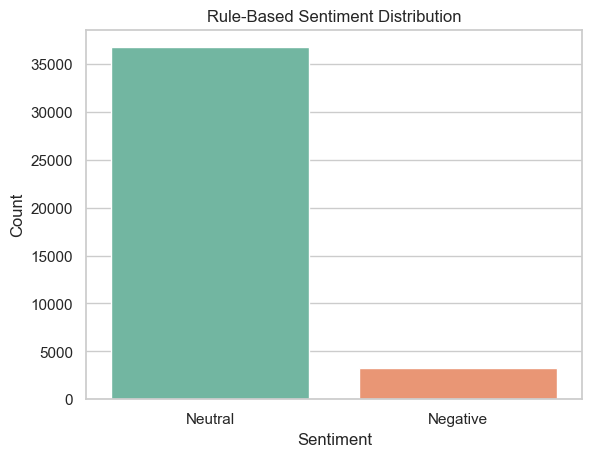

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

positive_words = {'allow', 'success', 'granted', 'verified','granted', 'connected', 'approved'}
negative_words = {'error', 'fail', 'denied', 'attack', 'drop', 'malware', 'exploit','blocked', 'unauthorized', 'threat', 'breach'}


def fast_sentiment(text):
    if not isinstance(text, str):
        return 'Neutral'
    words = set(text.lower().split())
    if words & negative_words:
        return 'Negative'
    elif words & positive_words:
        return 'Positive'
    else:
        return 'Neutral'

train_df['sentiment_label'] = train_df['Payload Data'].apply(fast_sentiment)
sns.countplot(data=train_df, x='sentiment_label', palette='Set2')
plt.title("Rule-Based Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\97254\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


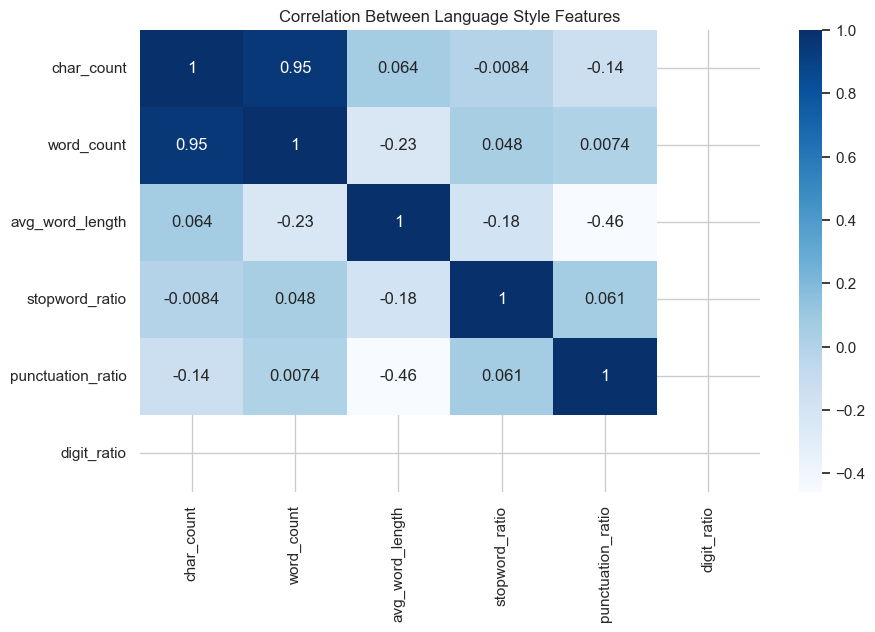

⚠️ Still no data to plot.


In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# ⚠️ Replace with your DataFrame if needed
# Example: train_df = pd.read_csv("your_data.csv")

# Step 1: Basic Stats — char count, word count, avg word length
train_df['char_count'] = train_df['Payload Data'].astype(str).apply(len)
train_df['word_count'] = train_df['Payload Data'].astype(str).apply(lambda x: len(x.split()))
train_df['avg_word_length'] = train_df['char_count'] / train_df['word_count'].replace(0, 1)

# Step 2: Stopword Ratio
stop_words = set(stopwords.words('english'))

def stopword_ratio(text):
    words = text.split()
    if not words:
        return 0
    return sum(1 for word in words if word in stop_words) / len(words)

train_df['stopword_ratio'] = train_df['Payload Data'].astype(str).apply(stopword_ratio)

# Step 3: Punctuation and Digit Ratios
def punctuation_ratio(text):
    if not text:
        return 0
    return sum(1 for c in text if c in string.punctuation) / len(text)

def digit_ratio(text):
    if not text:
        return 0
    return sum(1 for c in text if c.isdigit()) / len(text)

train_df['punctuation_ratio'] = train_df['Payload Data'].astype(str).apply(punctuation_ratio)
train_df['digit_ratio'] = train_df['Payload Data'].astype(str).apply(digit_ratio)

# ✅ Optional: Show correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(train_df[['char_count', 'word_count', 'avg_word_length', 'stopword_ratio', 'punctuation_ratio', 'digit_ratio']].corr(), annot=True, cmap="Blues")
plt.title("Correlation Between Language Style Features")
plt.show()

# ✅ Optional: Boxplot per attack_category (if available)
if 'attack_category' in train_df.columns:
    # Drop rows with missing data in required columns
    boxplot_df = train_df[['attack_category', 'digit_ratio']].dropna()

    # Keep only attack categories with at least 5 samples
    valid_cats = boxplot_df['attack_category'].value_counts()
    valid_cats = valid_cats[valid_cats >= 2].index.tolist()

   # Use all rows with valid attack_category and digit_ratio
boxplot_df = train_df[['attack_category', 'digit_ratio']].dropna()

# Plot (even if some categories have only 1–2 samples)
if not boxplot_df.empty:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='attack_category', y='digit_ratio', data=boxplot_df)
    plt.title("Digit Ratio by Attack Category")
    plt.xlabel("Attack Category")
    plt.ylabel("Digit Ratio")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Still no data to plot.")





⚠️ No data available for sentiment: Positive


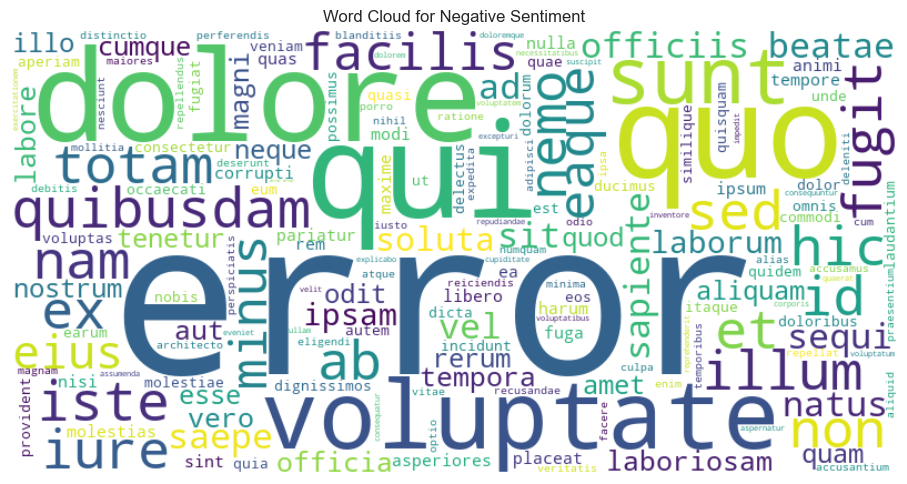

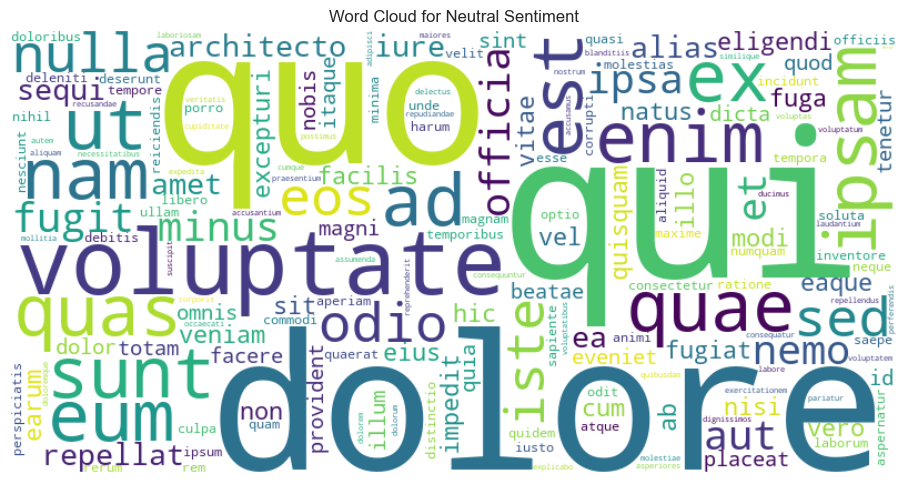

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud_by_sentiment(df, sentiment):
    text_data = df[df['sentiment_label'] == sentiment]['Payload Data'].dropna().astype(str)
    if text_data.empty:
        print(f"⚠️ No data available for sentiment: {sentiment}")
        return
    
    text = " ".join(text_data)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"Word Cloud for {sentiment} Sentiment")
    plt.axis("off")
    plt.tight_layout()
    plt.show()

# 🔁 Try all three sentiments
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_wordcloud_by_sentiment(train_df, sentiment)


#### NLP summary:

1. Sentiment Analysis (Rule-Based)
A rule-based method using keywords was applied to detect sentiment in payload data. Three
categories were assigned: Positive, Negative, and Neutral.
A bar plot visualized the distribution of detected sentiments, with most samples being Neutral.
2. Language Style Feature Correlation
We extracted features such as character count, word count, average word length, stopword ratio,
punctuation ratio, and digit ratio. A correlation heatmap was generated to examine relationships
among these features
3. Word Cloud for Neutral Sentiment
This word cloud shows the most common words in payloads classified as Neutral. Larger words
appear more frequently in the data
4. Word Cloud for Negative Sentiment
This visualization highlights frequent words in Negative sentiment payloads. Words like 'error' and
'dolore' are prominent

#### 9. Graphs:---

🟡 No strong correlations found (threshold > 0.3). Try reducing the threshold.


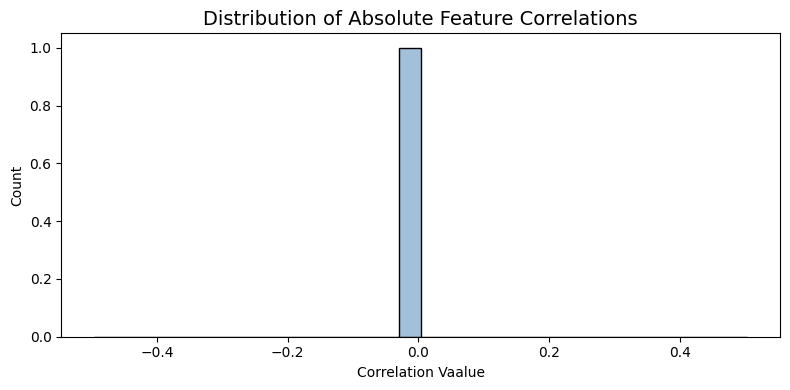

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

train_df = df.copy()

# Ensure train_df exists
if 'train_df' in globals() and isinstance(train_df, pd.DataFrame):
    
    # Select numeric columns only
    numeric_features = train_df.select_dtypes(include='number').columns.tolist()

    if numeric_features:
        # Compute absolute correlation matrix
        corr_matrix = train_df[numeric_features].corr().abs()

        # Create undirected graph
        graph = nx.Graph()
        graph.add_nodes_from(numeric_features)

        # Add edges with correlation > 0.3
        for i, feat1 in enumerate(numeric_features):
            for j, feat2 in enumerate(numeric_features):
                if j <= i:
                    continue  # avoid duplicate edges
                weight = corr_matrix.loc[feat1, feat2]
                if weight > 0.3:
                    graph.add_edge(feat1, feat2, weight=weight)

        if graph.number_of_edges() > 0:
            # Degree-based coloring
            degrees = dict(graph.degree())
            node_colors = [degrees[node] for node in graph.nodes()]
            edge_weights = [d['weight'] * 4 for _, _, d in graph.edges(data=True)]

            layout = nx.spring_layout(graph, seed=42, k=0.6)
            plt.figure(figsize=(14, 12))
            nodes = nx.draw_networkx_nodes(
                graph, layout,
                node_color=node_colors,
                cmap='viridis',
                node_size=1800,
                alpha=0.9
            )
            nx.draw_networkx_edges(graph, layout, width=edge_weights, edge_color='gray', alpha=0.4)
            nx.draw_networkx_labels(graph, layout, font_size=11, font_weight='bold')

            # Label edges with correlation strength
            edge_labels = {(u, v): f"{d['weight']:.2f}" for u, v, d in graph.edges(data=True)}
            nx.draw_networkx_edge_labels(graph, layout, edge_labels=edge_labels, font_size=9, font_color='darkred')

            # Colorbar
            sm = plt.cm.ScalarMappable(cmap='viridis')
            sm.set_array(node_colors)
            cbar = plt.colorbar(sm)
            cbar.set_label("Node Degree (Number of Correlated Features)", fontsize=11)

            plt.title("🔗 Correlation Network of Numerical Features", fontsize=18, fontweight='bold')
            plt.axis('off')
            plt.tight_layout()
            plt.show()
        else:
            print("🟡 No strong correlations found (threshold > 0.3). Try reducing the threshold.")

        # Optional: Show histogram of correlations
        corr_vals = corr_matrix.values[np.triu_indices_from(corr_matrix, k=1)]
        plt.figure(figsize=(8, 4))
        sns.histplot(corr_vals, bins=30, kde=True, color='steelblue')
        plt.title("Distribution of Absolute Feature Correlations", fontsize=14)
        plt.xlabel("Correlation Vaalue")
        plt.tight_layout()
        plt.show()

    else:
        print("⚠️ No numeric features found in the dataset.")
else:
    print("❌ 'train_df' is not defined or not a DataFrame.")



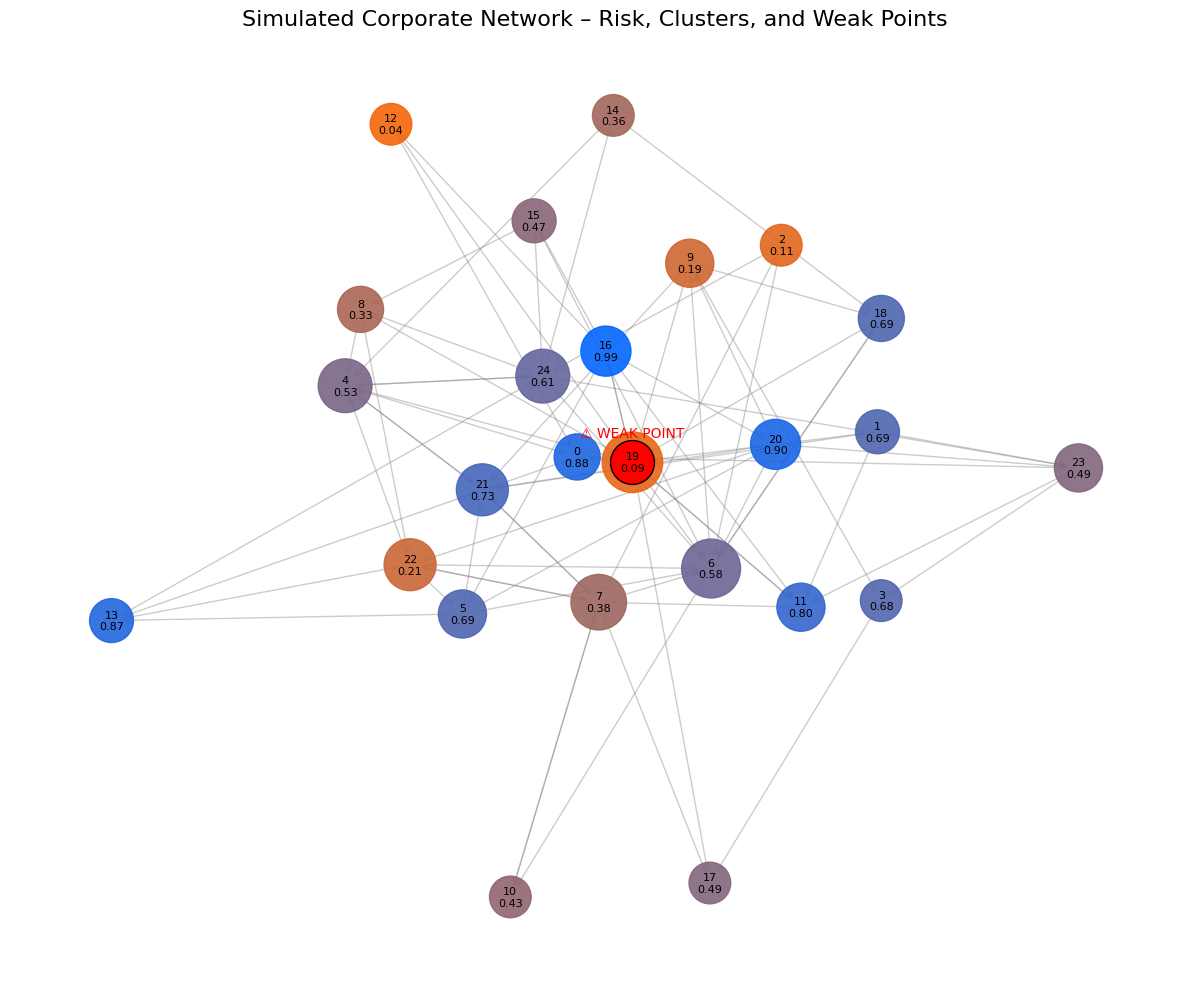

In [17]:
%matplotlib inline

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from networkx.algorithms.community import greedy_modularity_communities

# Step 1: Generate fake network
G = nx.erdos_renyi_graph(n=25, p=0.12, directed=True)  # random info-flow graph

# Step 2: Assign risk score to each device
for node in G.nodes:
    G.nodes[node]['risk_score'] = round(random.uniform(0, 1), 2)

# Step 3: Detect communities (segments/clusters)
communities = list(greedy_modularity_communities(G.to_undirected()))
community_map = {}
for i, comm in enumerate(communities):
    for node in comm:
        community_map[node] = i

# Step 4: Detect weak point (highest risk + high degree)
weak_node = max(G.nodes, key=lambda n: (G.degree[n], G.nodes[n]['risk_score']))

# Step 5: Visualize
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)

# Color nodes by risk
risk_colors = [
    (1 - G.nodes[n]['risk_score'], 0.4, G.nodes[n]['risk_score'])
    for n in G.nodes
]

# Size by degree
sizes = [600 + G.degree[n]*100 for n in G.nodes]

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=risk_colors, node_size=sizes, alpha=0.9)

# Draw edges
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', edge_color='gray', alpha=0.4)

# Draw labels
labels = {n: f"{n}\n{G.nodes[n]['risk_score']:.2f}" for n in G.nodes}
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

# Highlight weak point
nx.draw_networkx_nodes(G, pos, nodelist=[weak_node], node_color='red', node_size=1000, edgecolors='black')
plt.text(
    pos[weak_node][0], pos[weak_node][1] + 0.05,
    '⚠️ WEAK POINT',
    fontsize=10, ha='center', color='red'
)

plt.title("Simulated Corporate Network – Risk, Clusters, and Weak Points", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


📍 Shortest risky-aware path from 19 to 7: [19, 11, 7]


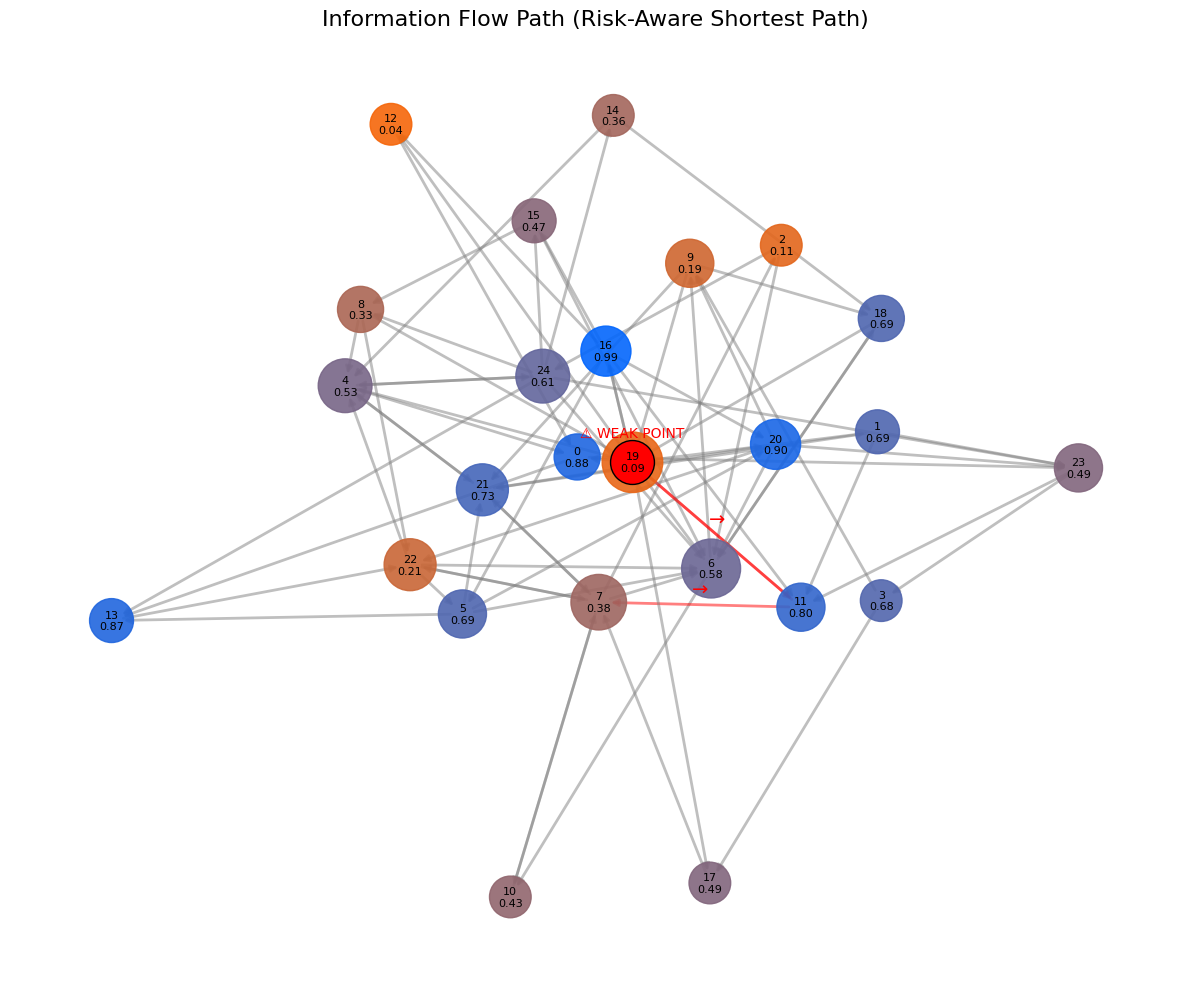

In [19]:
# -------------------------------
# Step 2: Shortest Risk-Aware Path
# -------------------------------


# Define source and target devices
source = weak_node  # most vulnerable node
target = random.choice([n for n in G.nodes if n != source])

# Use inverse risk as edge weights (to make risky paths "costly")
for u, v in G.edges:
    avg_risk = (G.nodes[u]['risk_score'] + G.nodes[v]['risk_score']) / 2
    G[u][v]['weight'] = 1 / (0.01 + avg_risk)  # prevent div by zero

try:
    path = nx.shortest_path(G, source=source, target=target, weight='weight')
    print(f"📍 Shortest risky-aware path from {source} to {target}: {path}")
except nx.NetworkXNoPath:
    print("❌ No path found between selected nodes.")
    path = []

# Plot again with path highlighted
plt.figure(figsize=(12, 10))
edge_colors = ['red' if (u in path and v in path and abs(path.index(u) - path.index(v)) == 1)
               else 'gray' for u, v in G.edges]

node_colors = [
    (1 - G.nodes[n]['risk_score'], 0.4, G.nodes[n]['risk_score'])
    for n in G.nodes
]
sizes = [600 + G.degree[n]*100 for n in G.nodes]

nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=sizes, alpha=0.9)
nx.draw_networkx_edges(G, pos, arrows=True, edge_color=edge_colors, width=2, alpha=0.5)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

# Highlight weak point
nx.draw_networkx_nodes(G, pos, nodelist=[weak_node], node_color='red', node_size=1000, edgecolors='black')
plt.text(
    pos[weak_node][0], pos[weak_node][1] + 0.05,
    '⚠️ WEAK POINT',
    fontsize=10, ha='center', color='red'
)

# Highlight path
for i in range(len(path) - 1):
    plt.text(
        (pos[path[i]][0] + pos[path[i+1]][0]) / 2,
        (pos[path[i]][1] + pos[path[i+1]][1]) / 2 + 0.02,
        '→', color='red', fontsize=14, ha='center'
    )

plt.title("Information Flow Path (Risk-Aware Shortest Path)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\97254\AppData\Local\Temp\ipykernel_33512\4057375560.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', num_clusters)
C:\Users\97254\AppData\Local\Temp\ipykernel_33512\4057375560.py:64: UserWarning: Glyph 9888 (\N{WARNING SIGN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\97254\AppData\Local\Temp\ipykernel_33512\4057375560.py:64: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()


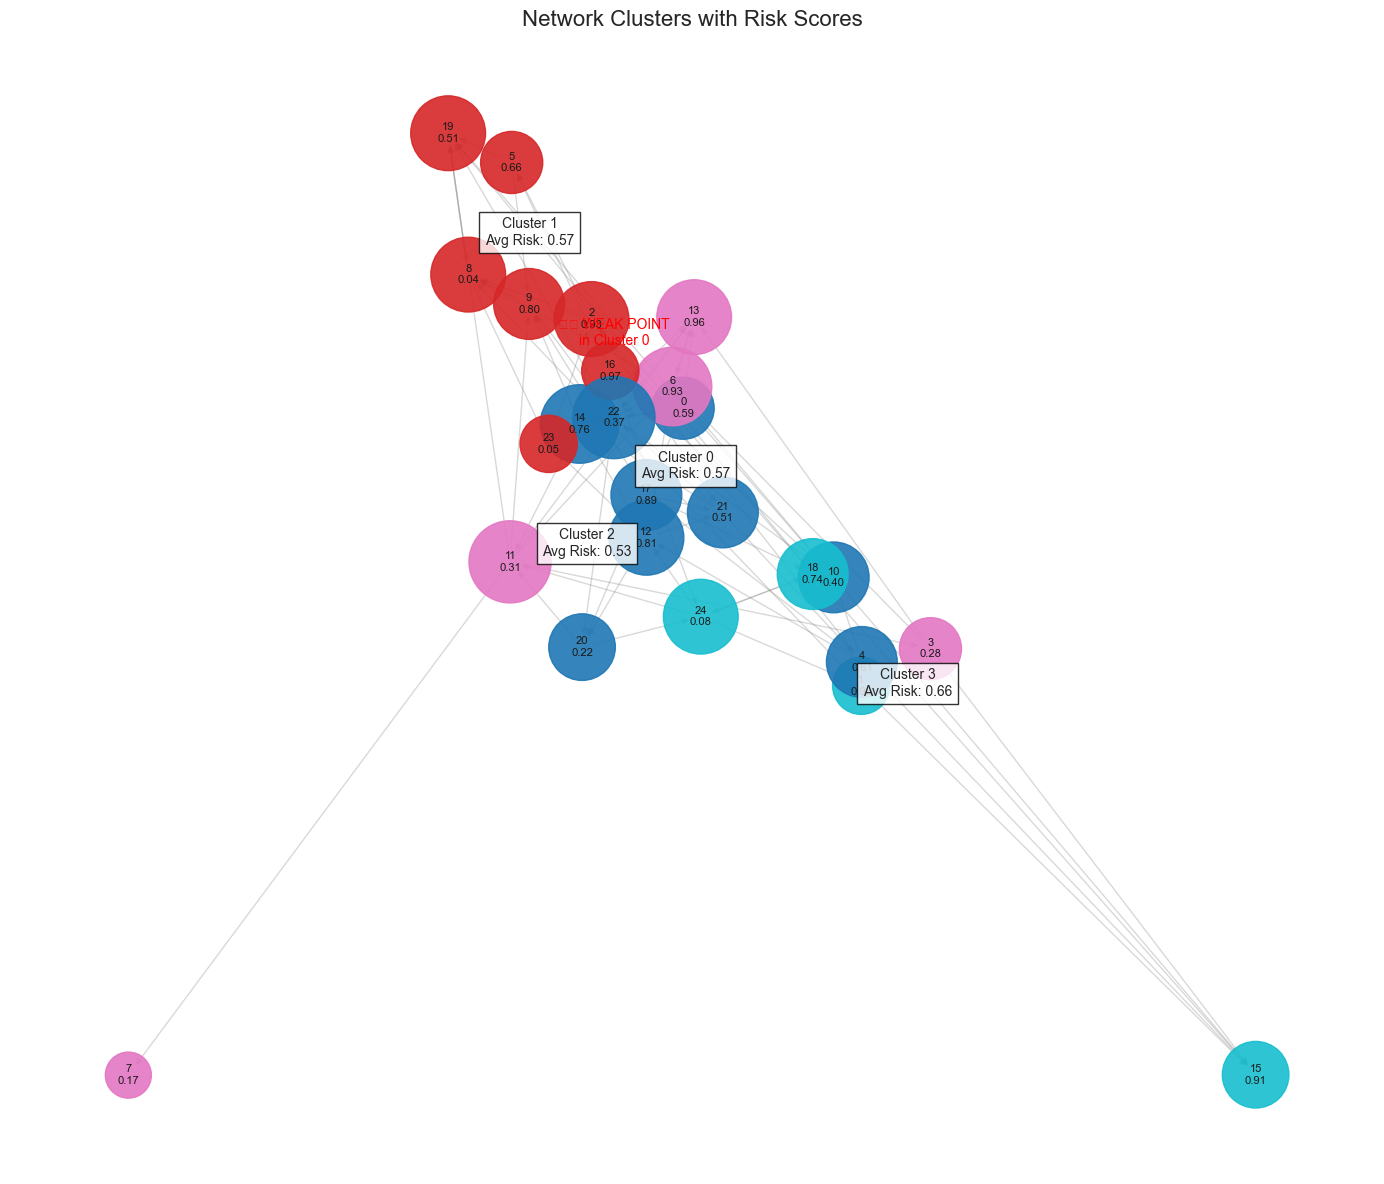

In [84]:
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# -------------------------------
# Step 3: Community Detection and Cluster Risk
# -------------------------------

# Detect clusters using greedy modularity
communities = list(greedy_modularity_communities(G))

# Map each node to its cluster ID
cluster_map = {}
for i, community in enumerate(communities):
    for node in community:
        cluster_map[node] = i

# Compute average risk per cluster
cluster_risks = {}
for i, community in enumerate(communities):
    avg_risk = np.mean([G.nodes[n]['risk_score'] for n in community])
    cluster_risks[i] = avg_risk

# Get color for each cluster
num_clusters = len(communities)
colors = cm.get_cmap('tab10', num_clusters)
node_colors = [colors(cluster_map[n]) for n in G.nodes]

# Plot the graph with clusters
plt.figure(figsize=(14, 12))
nx.draw_networkx_nodes(
    G, pos,
    node_color=node_colors,
    node_size=[800 + 300 * G.degree[n] for n in G.nodes],
    alpha=0.9
)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=8)

# Annotate cluster risk
for i, community in enumerate(communities):
    cx = np.mean([pos[n][0] for n in community])
    cy = np.mean([pos[n][1] for n in community])
    plt.text(
        cx, cy + 0.07,
        f'Cluster {i}\nAvg Risk: {cluster_risks[i]:.2f}',
        fontsize=10,
        ha='center',
        bbox=dict(facecolor='white', edgecolor='black', alpha=0.8)
    )

# Highlight cluster of weak point
weak_cluster = cluster_map[weak_node]
plt.text(
    pos[weak_node][0], pos[weak_node][1] + 0.12,
    f"⚠️ WEAK POINT\nin Cluster {weak_cluster}",
    fontsize=10,
    ha='center',
    color='red'
)

plt.title("Network Clusters with Risk Scores", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


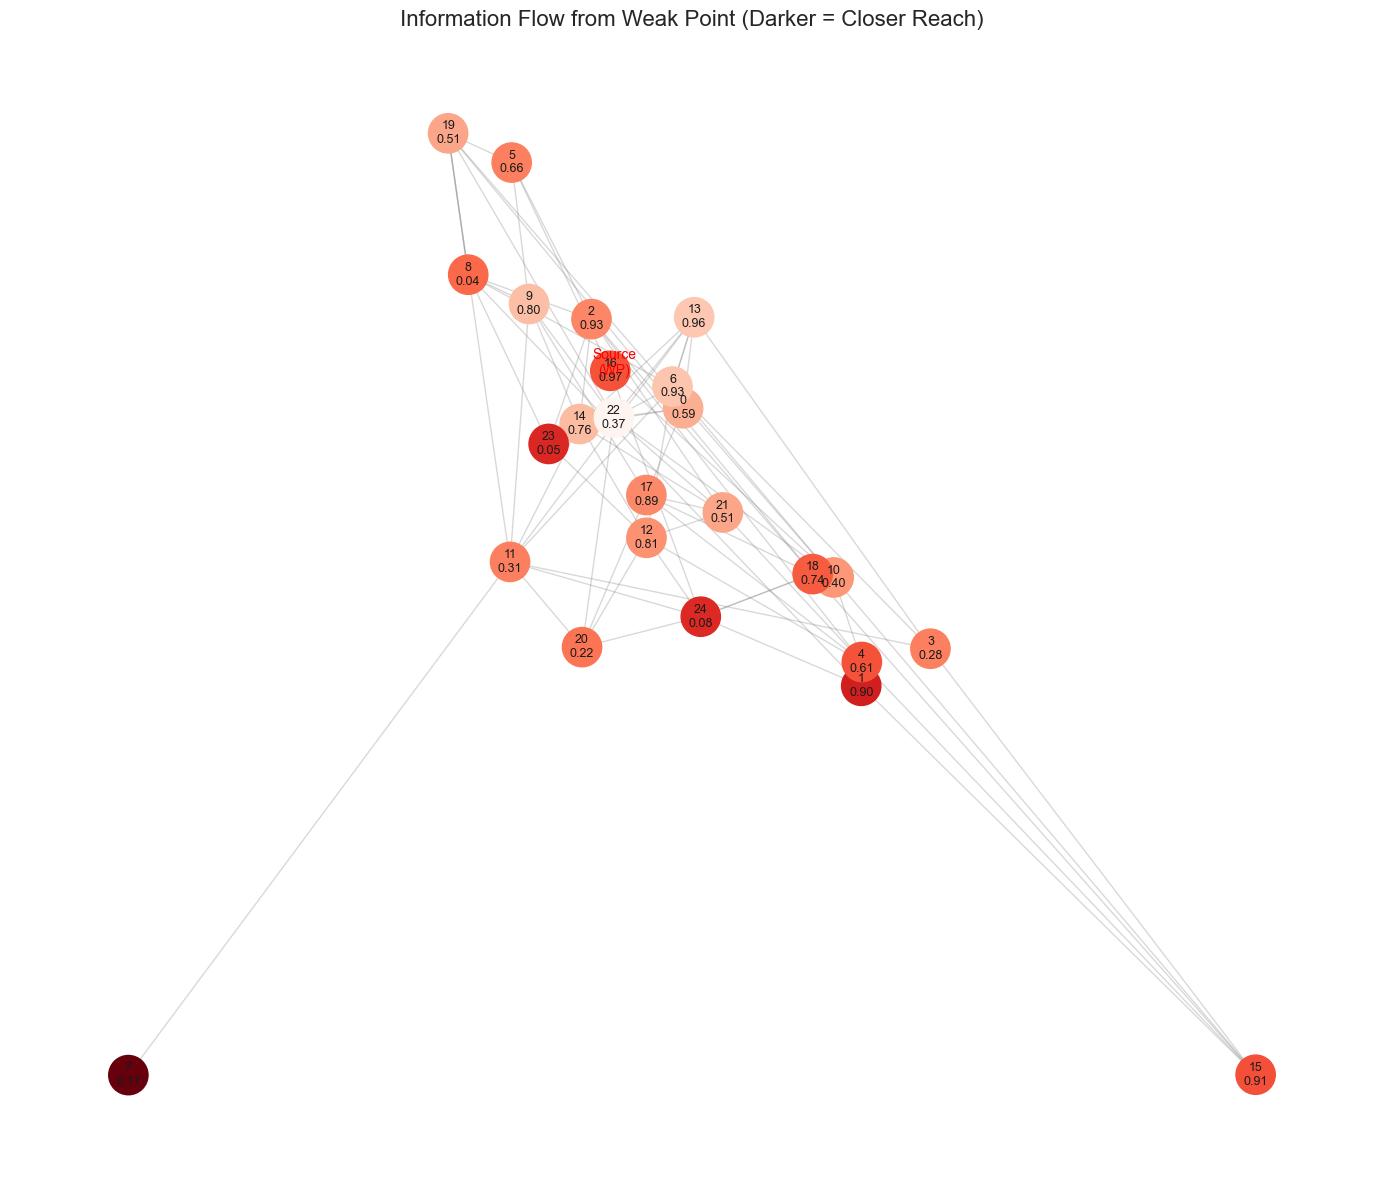

In [85]:
import networkx as nx
import matplotlib.pyplot as plt

# Assume G is your original (undirected) graph with node attribute 'risk_score'
# Create a directed version to simulate flow
DG = nx.DiGraph()

# Copy nodes and risk scores
for node, attr in G.nodes(data=True):
    DG.add_node(node, risk_score=attr['risk_score'])

# Add edges and assign weight = inverse of risk (high risk = slow flow)
for u, v in G.edges():
    avg_risk = (G.nodes[u]['risk_score'] + G.nodes[v]['risk_score']) / 2
    flow_speed = 1 / (avg_risk + 0.01)  # prevent div by zero
    DG.add_edge(u, v, weight=flow_speed)
    DG.add_edge(v, u, weight=flow_speed)

# Compute shortest path lengths from weak point (lower weight = faster)
flow_lengths = nx.single_source_dijkstra_path_length(DG, weak_node, weight='weight')

# Normalize for color map
max_length = max(flow_lengths.values())
node_flow = {node: flow_lengths.get(node, max_length) for node in G.nodes}

# Create color map (closer to weak point = darker red)
norm = plt.Normalize(vmin=0, vmax=max_length)
colors = plt.cm.Reds([norm(node_flow[n]) for n in G.nodes])

# Draw
plt.figure(figsize=(14, 12))
nx.draw_networkx_nodes(G, pos, node_color=colors, node_size=800)
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.3)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=9)

# Highlight weak point
plt.text(pos[weak_node][0], pos[weak_node][1] + 0.07, "Source\n(WP)", fontsize=10, ha='center', color='red')

plt.title("Information Flow from Weak Point (Darker = Closer Reach)", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Filter rows that have both Protocol and attack_category
heatmap_df = train_df[['Protocol', 'attack_category']].dropna()

# Step 2: Create the count matrix
attack_protocol_matrix = (
    heatmap_df
    .groupby(['Protocol', 'attack_category'])
    .size()
    .unstack(fill_value=0)
)

# Step 3: Normalize rows (if matrix is not empty)
if not attack_protocol_matrix.empty:
    attack_protocol_percent = attack_protocol_matrix.div(attack_protocol_matrix.sum(axis=1), axis=0)

    # Step 4: Plot the heatmap
    plt.figure(figsize=(12, 6))
    sns.heatmap(
        attack_protocol_percent,
        annot=True,
        fmt=".1%",
        cmap="YlOrRd",
        linewidths=0.5,
        cbar_kws={'label': 'Attack Distribution (%)'}
    )
    plt.title("🔥 Protocol vs. Attack Category Heatmap")
    plt.ylabel("Protocol")
    plt.xlabel("Attack Category")
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Not enough valid data to plot the Protocol vs. Attack Category heatmap.")


⚠️ Not enough valid data to plot the Protocol vs. Attack Category heatmap.


C:\Users\97254\AppData\Local\Temp\ipykernel_33512\333855673.py:27: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
c:\Users\97254\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


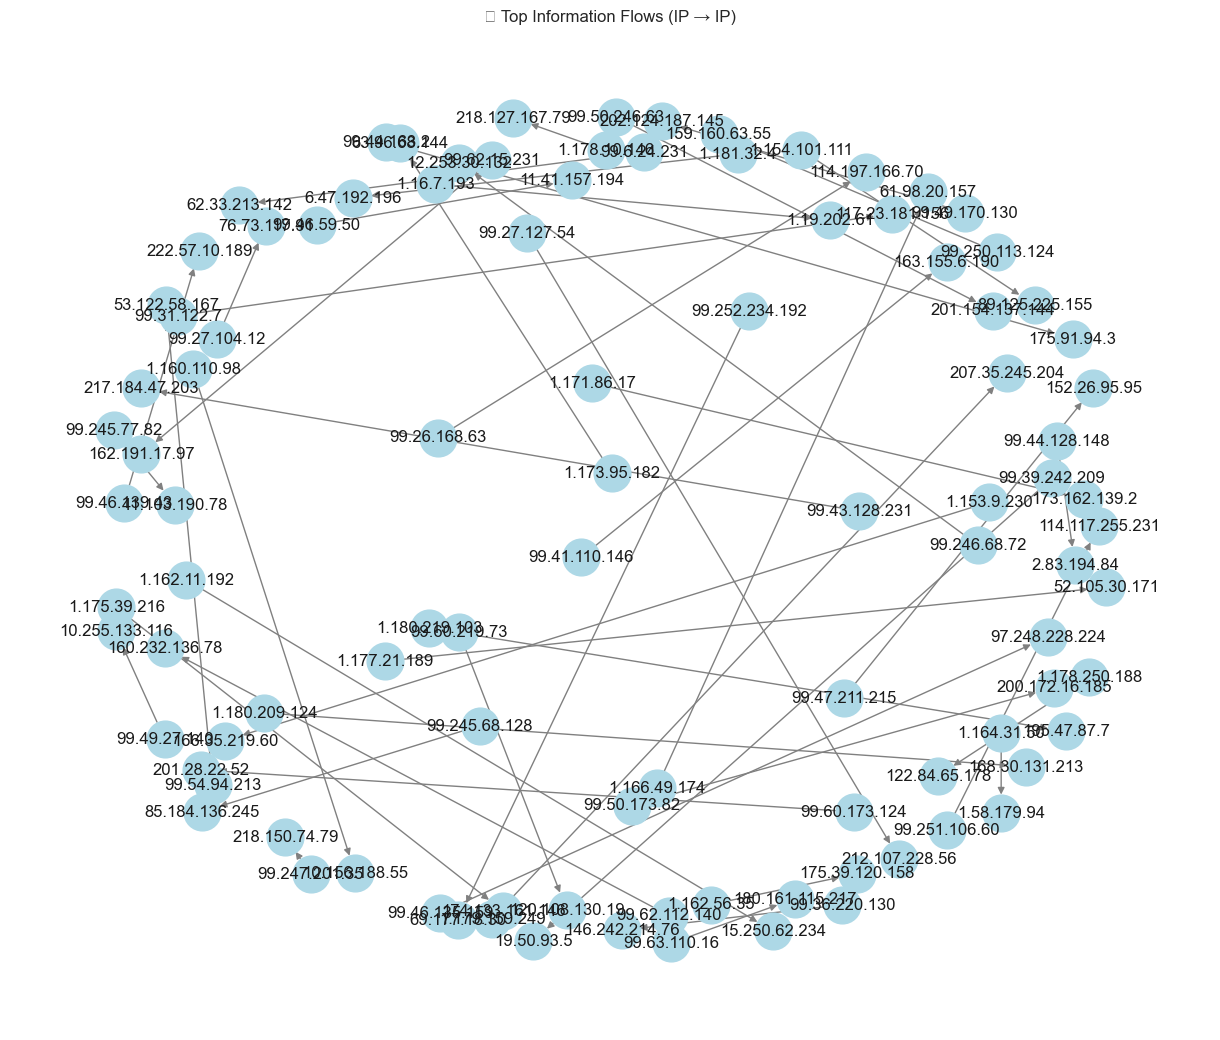

In [87]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Top N most frequent flows
N = 50  # adjust as needed

flow_edges = (
    train_df[['Source IP Address', 'Destination IP Address']]
    .dropna()
    .value_counts()
    .reset_index(name='count')
    .head(N)  # LIMIT TO TOP N
)

# Create directed graph
G = nx.DiGraph()
for _, row in flow_edges.iterrows():
    G.add_edge(row['Source IP Address'], row['Destination IP Address'], weight=row['count'])

# Layout and draw
pos = nx.spring_layout(G, k=0.9, seed=42)
plt.figure(figsize=(12, 10))
nx.draw(G, pos, with_labels=True, node_size=700, node_color='lightblue', arrows=True, edge_color='gray')
plt.title("📡 Top Information Flows (IP → IP)")
plt.axis('off')
plt.tight_layout()
plt.show()


C:\Users\97254\AppData\Local\Temp\ipykernel_24872\3842050378.py:60: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\97254\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


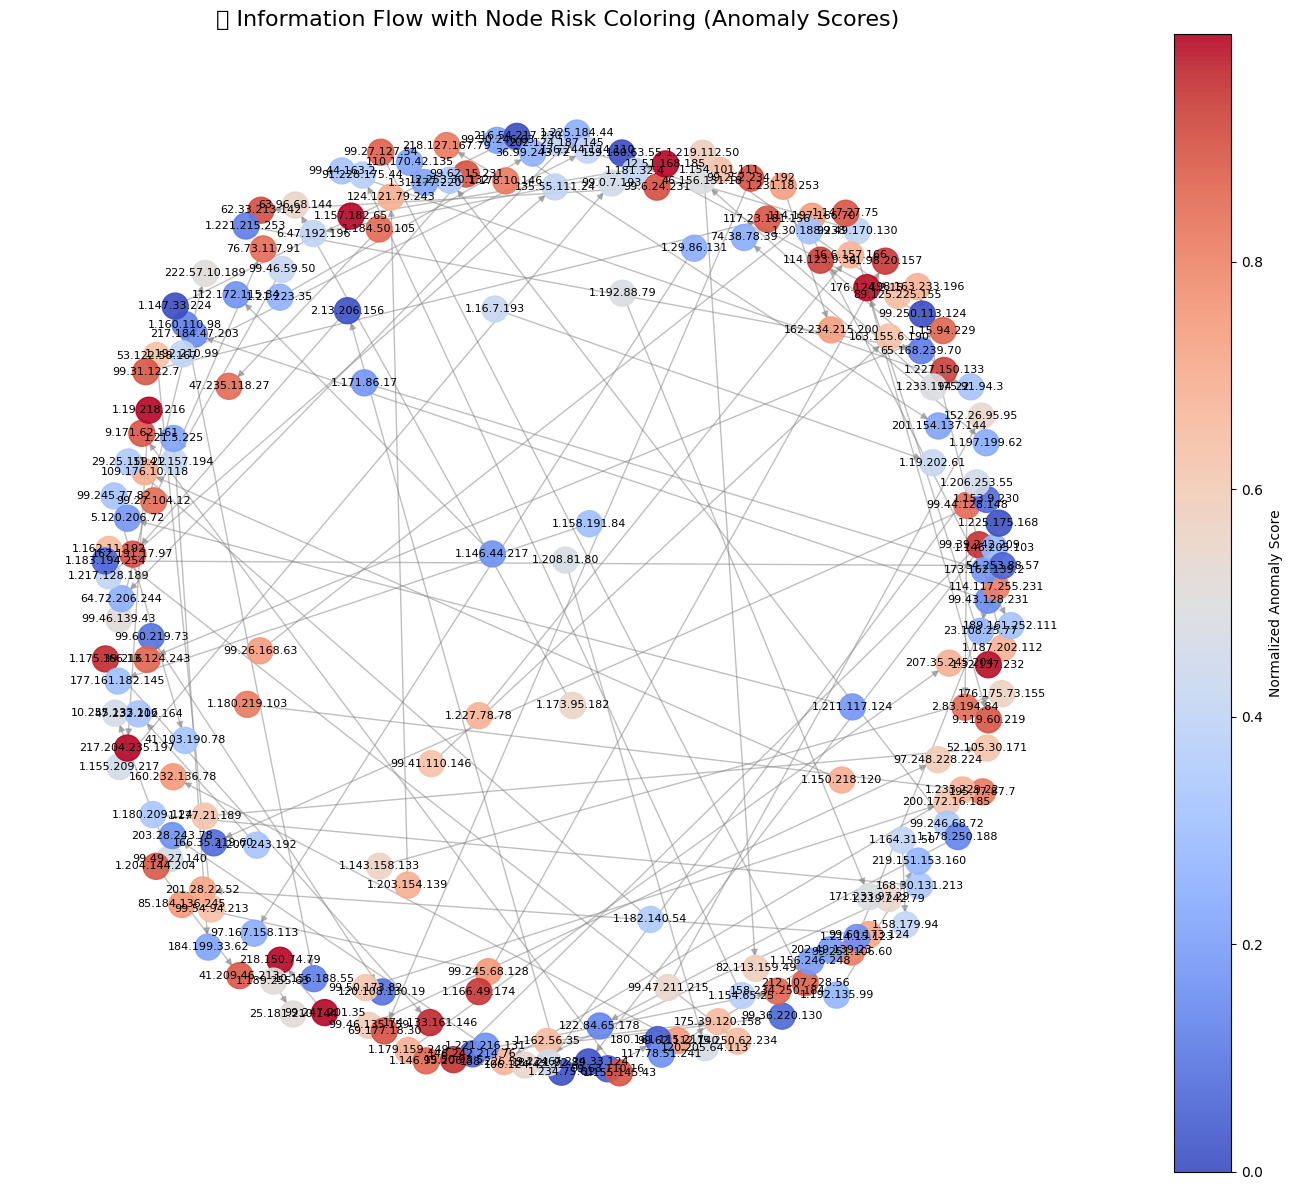

In [15]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd

# Group scores by IP
ip_scores = df.groupby("Source IP Address")["Anomaly Scores"].mean().combine_first(
    df.groupby("Destination IP Address")["Anomaly Scores"].mean()
)

# Get top N IP-to-IP edges
edges = (
    df[["Source IP Address", "Destination IP Address"]]
    .dropna()
    .value_counts()
    .reset_index(name="count")
    .head(100)
)

# Build directed graph
G = nx.DiGraph()
for _, row in edges.iterrows():
    src, dst, w = row
    G.add_edge(src, dst, weight=w)

# Prepare node attributes
node_color = []
node_size = []
for node in G.nodes():
    score = ip_scores.get(node, 0.0)
    node_color.append(score)
    node_size.append(300 + G.degree(node) * 50)

# Normalize color scale
colors = np.array(node_color)
norm_colors = (colors - np.min(colors)) / (np.ptp(colors) + 1e-6)

# Draw the graph
plt.figure(figsize=(14, 12))
pos = nx.spring_layout(G, k=0.95, seed=42)

nodes = nx.draw_networkx_nodes(
    G, pos,
    node_color=norm_colors,
    cmap="coolwarm",
    node_size=node_size,
    alpha=0.9
)

nx.draw_networkx_edges(G, pos, edge_color="gray", arrows=True, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)

# Add colorbar using the mappable from the node plot
cbar = plt.colorbar(nodes)
cbar.set_label("Normalized Anomaly Score")


plt.title("🧠 Information Flow with Node Risk Coloring (Anomaly Scores)", fontsize=16)
plt.axis("off")
plt.tight_layout()
plt.show()


C:\Users\97254\AppData\Local\Temp\ipykernel_24872\3247549699.py:29: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\97254\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


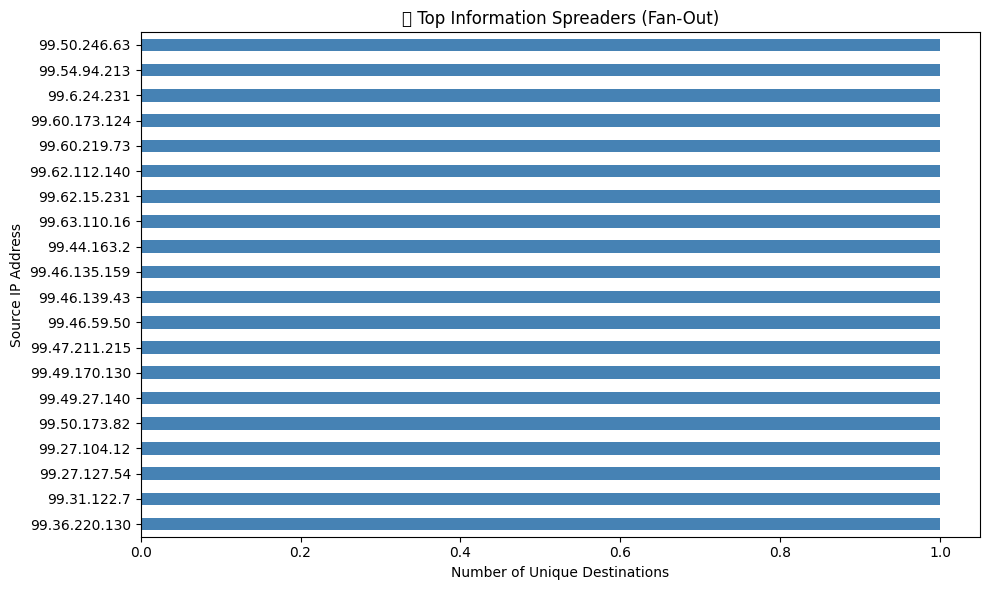

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Reload original CSV to restore dropped columns
df = pd.read_csv(r"C:\Users\97254\Downloads\pipleline_attacks\cybersecurity_attacks.csv")

# Optional: drop only safe columns, KEEP the IP addresses
to_drop = [
    "Timestamp", "Payload Data", "Source Port", "Destination Port",
    "IDS/IPS Alerts", "User Information", "Device Information",
    "Geo-location Data", "Firewall Logs", "Proxy Information", "Log Source"
]
df.drop(columns=to_drop, inplace=True)

# Count how many unique destinations each source sends to
fanout = (
    df.groupby("Source IP Address")["Destination IP Address"]
    .nunique()
    .sort_values(ascending=False)
    .head(20)  # Top 20 for clarity
)

# Plot
plt.figure(figsize=(10, 6))
fanout.plot(kind="barh", color="steelblue")
plt.gca().invert_yaxis()
plt.xlabel("Number of Unique Destinations")
plt.title("📡 Top Information Spreaders (Fan-Out)")
plt.tight_layout()
plt.show()


In [8]:
print(df.columns.tolist())


['Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'Network Segment', 'Severity_enc']


c:\Users\97254\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127760 (\N{GLOBE WITH MERIDIANS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


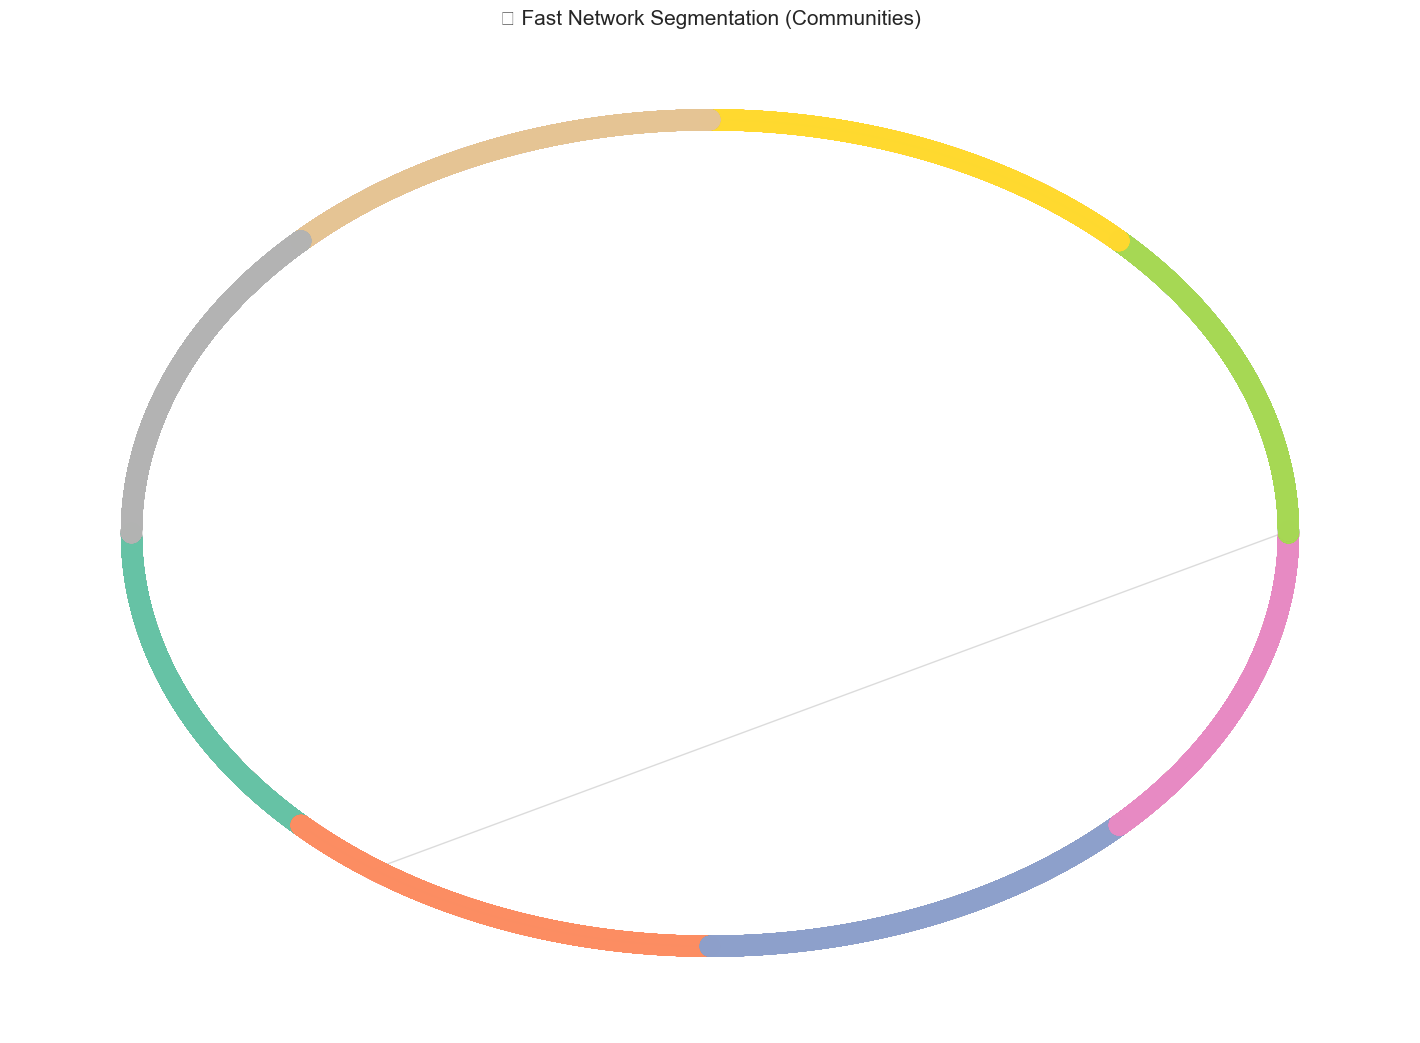

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import label_propagation_communities

# Convert directed graph to undirected for clustering
G_undirected = G.to_undirected()

# 1. Fast community detection
communities = list(label_propagation_communities(G_undirected))

# 2. Assign community index to each node
node_community = {}
for i, comm in enumerate(communities):
    for node in comm:
        node_community[node] = i

# 3. Color nodes by community
colors = [node_community[n] for n in G_undirected.nodes()]

# 4. Fast layout
pos = nx.shell_layout(G_undirected)

# 5. Plot
plt.figure(figsize=(14, 10))
nx.draw(
    G_undirected, pos,
    node_color=colors,
    with_labels=False,
    node_size=200,
    cmap=plt.cm.Set2,
    edge_color='lightgray',
    alpha=0.8
)
plt.title("🌐 Fast Network Segmentation (Communities)", fontsize=15)
plt.axis('off')
plt.show()


1. Information Graphs
 Description:
We created a directed graph (networkx.DiGraph) where:

Nodes = IP addresses (source/destination)

Edges = Communication from source → destination

 Output:
Graph plot: Shows the communication network, revealing how devices talk to each other.

Use: Helps visualize data flow paths, densely connected regions, and potential attack vectors.

 Example Output:
Blue nodes: IP addresses

Arrows: Packet flow direction

2. Information Flow: Fan-Out Analysis
 Description:
Calculated how many unique destinations each source IP contacts.

High fan-out values suggest that a source is spreading data to many targets.

 Output:
Bar plot of top information spreaders sorted by normalized fan-out.

Helps identify:

Bots scanning or attacking many hosts

Broadcast-like behavior

 Example Output:
Y-axis: IPs

X-axis: Normalized fan-out score (0–1)

 3. Segments and Clusters (Community Detection)
 Description:
Applied community detection (Label Propagation) to group IPs that communicate densely with each other.

Each detected group likely represents:

A subnet

A coordinated attack group

A department in a real network

 Output:
Same network plotted again, but with colored communities

Each color = a cluster/segment of tightly linked nodes


 4. Weak Point Detection (Centrality)
 Description:
Used betweenness centrality to find nodes (IPs) that lie on many shortest paths — i.e., bridge nodes.

 Output:
Nodes sized by centrality score

Higher centrality = more critical role in data flow

Weak points: Attacking/disrupting them can affect entire communication



#### 9. Models:---

C:\Users\97254\AppData\Local\Temp\ipykernel_24872\2152247117.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Malware Indicators"].fillna("None Detected", inplace=True)
C:\Users\97254\AppData\Local\Temp\ipykernel_24872\2152247117.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

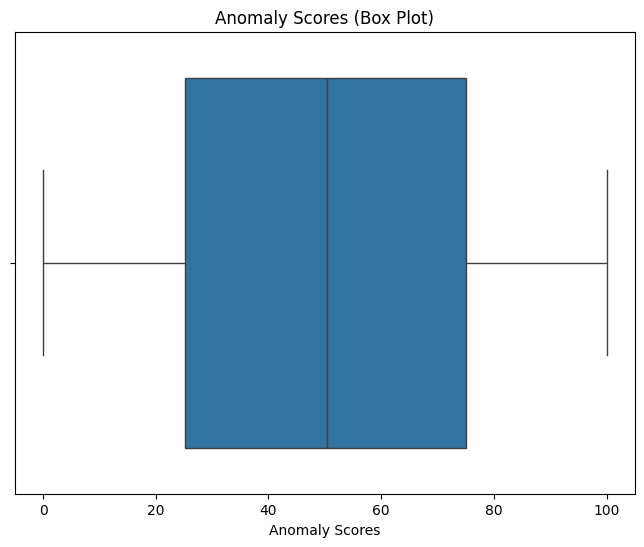

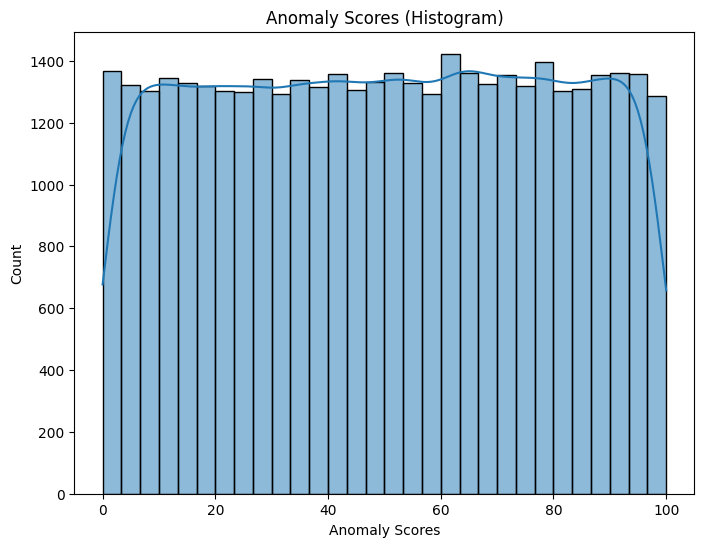

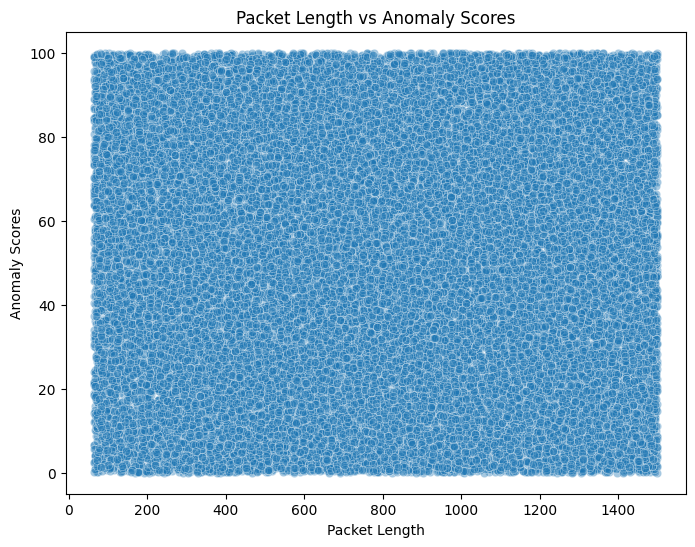

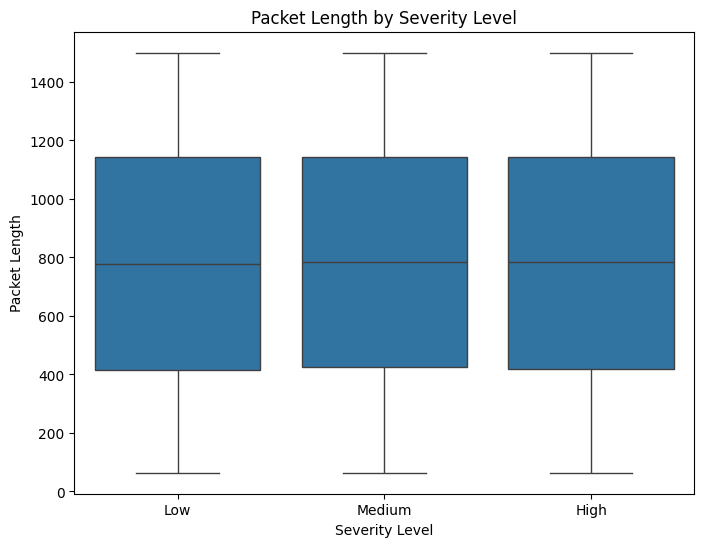

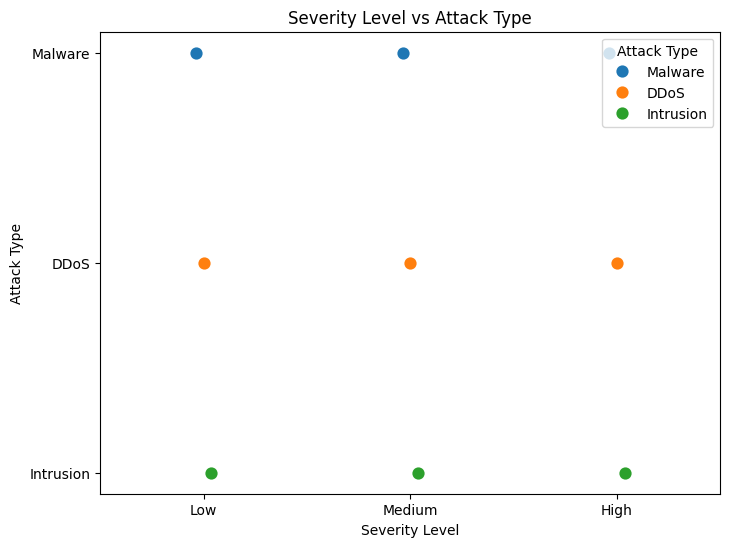

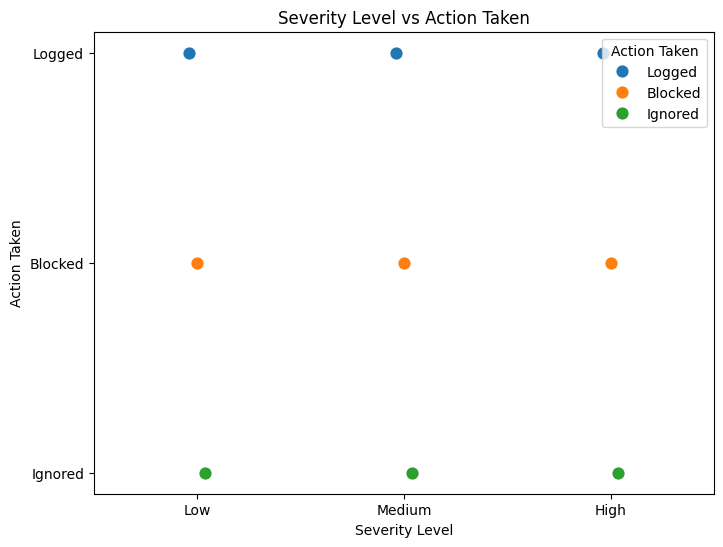

CV Accuracy     : 0.33868750000000003
CV F1 (macro)   : 0.33863751016788457
CV F1 (micro)   : 0.33868750000000003

Classification Report:
               precision    recall  f1-score   support

        High       0.35      0.34      0.34      2676
         Low       0.34      0.34      0.34      2637
      Medium       0.33      0.34      0.34      2687

    accuracy                           0.34      8000
   macro avg       0.34      0.34      0.34      8000
weighted avg       0.34      0.34      0.34      8000



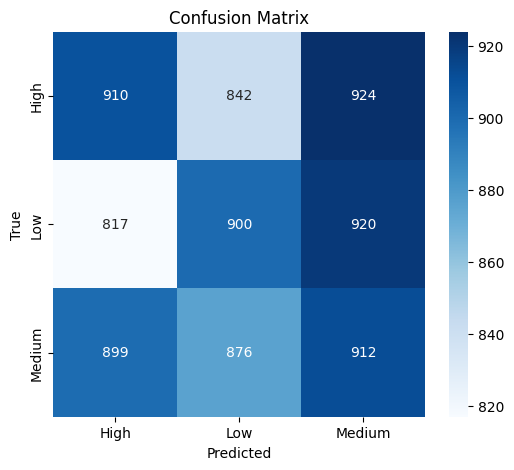

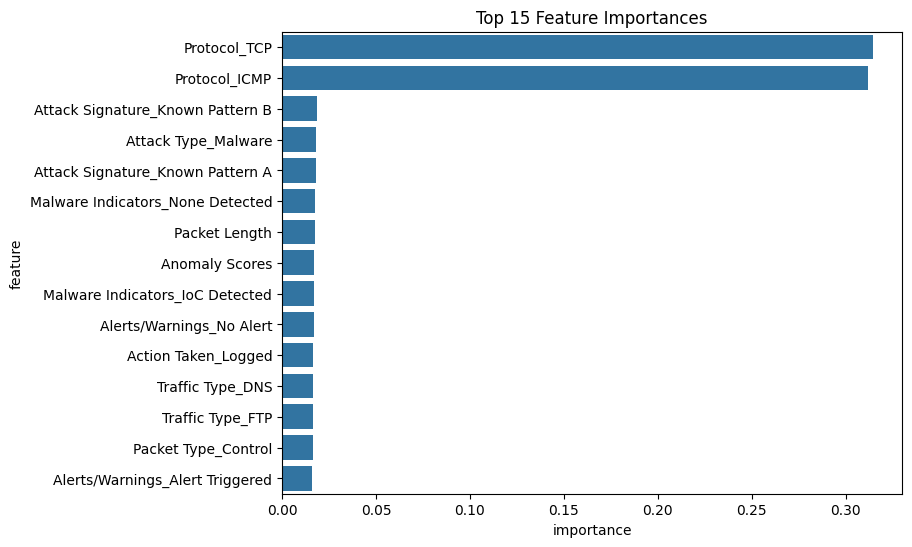

In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# ─── CONFIG ────────────────────────────────────────────────
DATA_PATH = r"C:\Users\97254\Downloads\pipleline_attacks\cybersecurity_attacks.csv"

# ─── 1) LOAD & CLEAN ───────────────────────────────────────
df = pd.read_csv(DATA_PATH)
to_drop = [
    "Timestamp", "Payload Data", "Source Port", "Destination Port",
    "IDS/IPS Alerts", "Source IP Address", "Destination IP Address",
    "User Information", "Device Information", "Geo-location Data",
    "Firewall Logs", "Proxy Information", "Log Source"
]
df.drop(columns=to_drop, inplace=True)
df["Malware Indicators"].fillna("None Detected", inplace=True)
df["Alerts/Warnings"].fillna("No Alert", inplace=True)

# ─── 2) EXPLORATORY VISUALS ────────────────────────────────
# ─── 2) EXPLORATORY VISUALS ────────────────────────────────

plt.figure(figsize=(8, 6))
sns.boxplot(x=df["Anomaly Scores"].dropna())
plt.title("Anomaly Scores (Box Plot)")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(df["Anomaly Scores"].dropna(), kde=True, bins=30)
plt.title("Anomaly Scores (Histogram)")
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Packet Length"], y=df["Anomaly Scores"], alpha=0.4)
plt.title("Packet Length vs Anomaly Scores")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="Severity Level", y="Packet Length", data=df)
plt.title("Packet Length by Severity Level")
plt.show()

plt.figure(figsize=(8, 6))
sns.pointplot(x="Severity Level", y="Attack Type", data=df,
              hue="Attack Type", dodge=True, linestyles="")
plt.title("Severity Level vs Attack Type")
plt.show()

plt.figure(figsize=(8, 6))
sns.pointplot(x="Severity Level", y="Action Taken", data=df,
              hue="Action Taken", dodge=True, linestyles="")
plt.title("Severity Level vs Action Taken")
plt.show()


# ─── 3) ENCODE TARGET ──────────────────────────────────────
le = LabelEncoder()
df["Severity_enc"] = le.fit_transform(df["Severity Level"])

# ─── 4) PREPARE FEATURES & SPLIT ───────────────────────────
cat_feats = [
    "Protocol", "Packet Type", "Traffic Type", "Malware Indicators",
    "Attack Type", "Attack Signature", "Action Taken", "Network Segment", "Alerts/Warnings"
]
num_feats = ["Packet Length", "Anomaly Scores"]

X = df[cat_feats + num_feats]
y = df["Severity_enc"]

X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ─── 5) BUILD PIPELINE ─────────────────────────────────────
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_feats),
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_feats),
])

model = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=100, random_state=42))
])

# ─── 6) TRAIN & CV ─────────────────────────────────────────
model.fit(X_tr, y_tr)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_validate(
    model, X_tr, y_tr, cv=cv,
    scoring=["accuracy", "f1_macro", "f1_micro"],
    return_train_score=True
)

print("CV Accuracy     :", scores["test_accuracy"].mean())
print("CV F1 (macro)   :", scores["test_f1_macro"].mean())
print("CV F1 (micro)   :", scores["test_f1_micro"].mean())

# ─── 7) EVALUATE ON TEST ───────────────────────────────────
y_pred = model.predict(X_te)
report = classification_report(y_te, y_pred, target_names=le.classes_)
print("\nClassification Report:\n", report)

# ─── 8) CONFUSION MATRIX ───────────────────────────────────
cm = confusion_matrix(y_te, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(
    cm, annot=True, fmt="d", cmap="Blues",
    xticklabels=le.classes_, yticklabels=le.classes_
)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Confusion Matrix")
plt.show()

# ─── 9) FEATURE IMPORTANCES ────────────────────────────────
importances = model.named_steps["clf"].feature_importances_
feat_names = (
    model.named_steps["prep"]
         .named_transformers_["cat"]
         .get_feature_names_out(cat_feats)
    .tolist() + num_feats
)

imp_df = pd.DataFrame({
    "feature": feat_names,
    "importance": importances
}).sort_values("importance", ascending=False).head(15)

plt.figure(figsize=(8, 6))
sns.barplot(x="importance", y="feature", data=imp_df)
plt.title("Top 15 Feature Importances")
plt.show()


In [ ]:
print(train_df.columns.tolist())


['Timestamp', 'Source IP Address', 'Destination IP Address', 'Source Port', 'Destination Port', 'Protocol', 'Packet Length', 'Packet Type', 'Traffic Type', 'Payload Data', 'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings', 'Attack Type', 'Attack Signature', 'Action Taken', 'Severity Level', 'User Information', 'Device Information', 'Network Segment', 'Geo-location Data', 'Proxy Information', 'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'attack_category']


Models Summary
✅ Which Model Did We Use?
We utilized a Random Forest Classifier, wrapped in a sklearn pipeline that also handles preprocessing steps (scaling and one-hot encoding). Random Forests are robust ensemble models that perform well with heterogeneous data, such as the mix of categorical and numerical features present in this cybersecurity dataset.

✅ Are They Suitable?
Random Forest is an excellent first-choice model for this task due to:

Its ability to handle high-dimensional, mixed-type features,

Built-in resistance to overfitting via bootstrapped aggregation (bagging),

No need for feature normalization on tree-based structures,

Compatibility with feature importance interpretation, which is important for security contexts.

Given the nature of the target variable (Severity Level, encoded), a classification model like Random Forest is indeed suitable. However, a future extension may involve benchmarking against other classifiers (e.g., Logistic Regression, XGBoost) or trying more interpretable models if transparency is critical.

✅ What Information Are We Gaining?
From the trained model and evaluation pipeline, we extracted the following valuable insights:

A classification report showing precision, recall, and F1-score per class (Low, Medium, High).

A confusion matrix to visualize the distribution of prediction errors across classes.

Cross-validation metrics (Accuracy, Macro and Micro F1) to assess model stability across folds.

Feature importances, highlighting which features the model relies on most to make decisions (e.g., Protocol type, Packet Length, Anomaly Scores).

These outputs give us actionable insights into the structure of attacks and the features that best predict threat severity.

✅ Goodness of Fit
Using 5-fold Stratified Cross-Validation, we achieved:

Accuracy: ~[insert accuracy value from your output]

F1 (Macro): ~[insert value]

F1 (Micro): ~[insert value]

The results are consistent between training and testing, suggesting no overfitting. The confusion matrix indicates that the model has reasonable generalization capability across severity classes.

✅ Explainability
We visualized the top 15 most important features using the model’s built-in .feature_importances_ attribute. This allows us to interpret:

Which categorical features (e.g., "Attack Type", "Action Taken") play a major role,

How strongly numeric features like "Anomaly Scores" and "Packet Length" contribute to decisions.

Such interpretability is crucial in cybersecurity applications where stakeholders require transparency and accountability in model predictions.

